In [1]:
#!pip install pingouin

# Breast Cancer Detection from image features

<center><img width="700" src="https://github.com/econdavidzh/2022_MLZ_Project/blob/main/Images/FNA.png?raw=true"></center>

Features are computed from a digitized image of a fine needle aspirate (FNA) of a breast mass. They describe characteristics of the cell nuclei present in the image. n the 3-dimensional space is that described in: [K. P. Bennett and O. L. Mangasarian: "Robust Linear Programming Discrimination of Two Linearly Inseparable Sets", Optimization Methods and Software 1, 1992, 23-34].

This database is also available through the UW CS ftp server: 

ftp ftp.cs.wisc.edu 

cd math-prog/cpo-dataset/machine-learn/WDBC/

Also can be found on UCI Machine Learning Repository: https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+%28Diagnostic%29

Attribute Information:

ID number
Diagnosis (M = malignant, B = benign) 3-32)
Ten real-valued features are computed for each cell nucleus:

a) radius (mean of distances from center to points on the perimeter) b) texture (standard deviation of gray-scale values) c) perimeter d) area e) smoothness (local variation in radius lengths) f) compactness (perimeter^2 / area - 1.0) g) concavity (severity of concave portions of the contour) h) concave points (number of concave portions of the contour) i) symmetry j) fractal dimension ("coastline approximation" - 1)

The mean, standard error and "worst" or largest (mean of the three largest values) of these features were computed for each image, resulting in 30 features. For instance, field 3 is Mean Radius, field 13 is Radius SE, field 23 is Worst Radius.

All feature values are recoded with four significant digits.

<center><img width="300" src="https://i.imgflip.com/4pc49i.jpg"></center>



## Libraries:

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

## Dataset:

In [3]:
data_url = 'https://raw.githubusercontent.com/econdavidzh/2022_MLZ_Project/main/Data/wdbc.csv'
data =  pd.read_csv(data_url, sep=",")
data

id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0      842302         M        17.99         10.38          122.80     1001.0   
1      842517         M        20.57         17.77          132.90     1326.0   
2    84300903         M        19.69         21.25          130.00     1203.0   
3    84348301         M        11.42         20.38           77.58      386.1   
4    84358402         M        20.29         14.34          135.10     1297.0   
..        ...       ...          ...           ...             ...        ...   
564    926424         M        21.56         22.39          142.00     1479.0   
565    926682         M        20.13         28.25          131.20     1261.0   
566    926954         M        16.60         28.08          108.30      858.1   
567    927241         M        20.60         29.33          140.10     1265.0   
568     92751         B         7.76         24.54           47.92      181.0   

     smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0            0.11840           0.27760         0.30010              0.14710   
1            0.08474           0.07864         0.08690              0.07017   
2            0.10960           0.15990         0.19740              0.12790   
3            0.14250           0.28390         0.24140              0.10520   
4            0.10030           0.13280         0.19800              0.10430   
..               ...               ...             ...                  ...   
564          0.11100           0.11590         0.24390              0.13890   
565          0.09780           0.10340         0.14400              0.09791   
566          0.08455           0.10230         0.09251              0.05302   
567          0.11780           0.27700         0.35140              0.15200   
568          0.05263           0.04362         0.00000              0.00000   

     ...  texture_worst  perimeter_worst  area_worst  smoothness_worst  \
0    ...          17.33           184.60      2019.0           0.16220   
1    ...          23.41           158.80      1956.0           0.12380   
2    ...          25.53           152.50      1709.0           0.14440   
3    ...          26.50            98.87       567.7           0.20980   
4    ...          16.67           152.20      1575.0           0.13740   
..   ...            ...              ...         ...               ...   
564  ...          26.40           166.10      2027.0           0.14100   
565  ...          38.25           155.00      1731.0           0.11660   
566  ...          34.12           126.70      1124.0           0.11390   
567  ...          39.42           184.60      1821.0           0.16500   
568  ...          30.37            59.16       268.6           0.08996   

     compactness_worst  concavity_worst  concave points_worst  symmetry_worst  \
0              0.66560           0.7119                0.2654          0.4601   
1              0.18660           0.2416                0.1860          0.2750   
2              0.42450           0.4504                0.2430          0.3613   
3              0.86630           0.6869                0.2575          0.6638   
4              0.20500           0.4000                0.1625          0.2364   
..                 ...              ...                   ...             ...   
564            0.21130           0.4107                0.2216          0.2060   
565            0.19220           0.3215                0.1628          0.2572   
566            0.30940           0.3403                0.1418          0.2218   
567            0.86810           0.9387                0.2650          0.4087   
568            0.06444           0.0000                0.0000          0.2871   

     fractal_dimension_worst  Unnamed: 32  
0                    0.11890          NaN  
1                    0.08902          NaN  
2                    0.08758          NaN  
3                    0.17300          NaN  
4      

In [4]:
# inspecting suspicious last column for nans:
data[data.columns[-1]].isnull().sum()

569

In [5]:
# drop last column after confirming full of nans:
data.pop(data.columns[-1])

0     NaN
1     NaN
2     NaN
3     NaN
4     NaN
       ..
564   NaN
565   NaN
566   NaN
567   NaN
568   NaN
Name: Unnamed: 32, Length: 569, dtype: float64

### Missing Values:

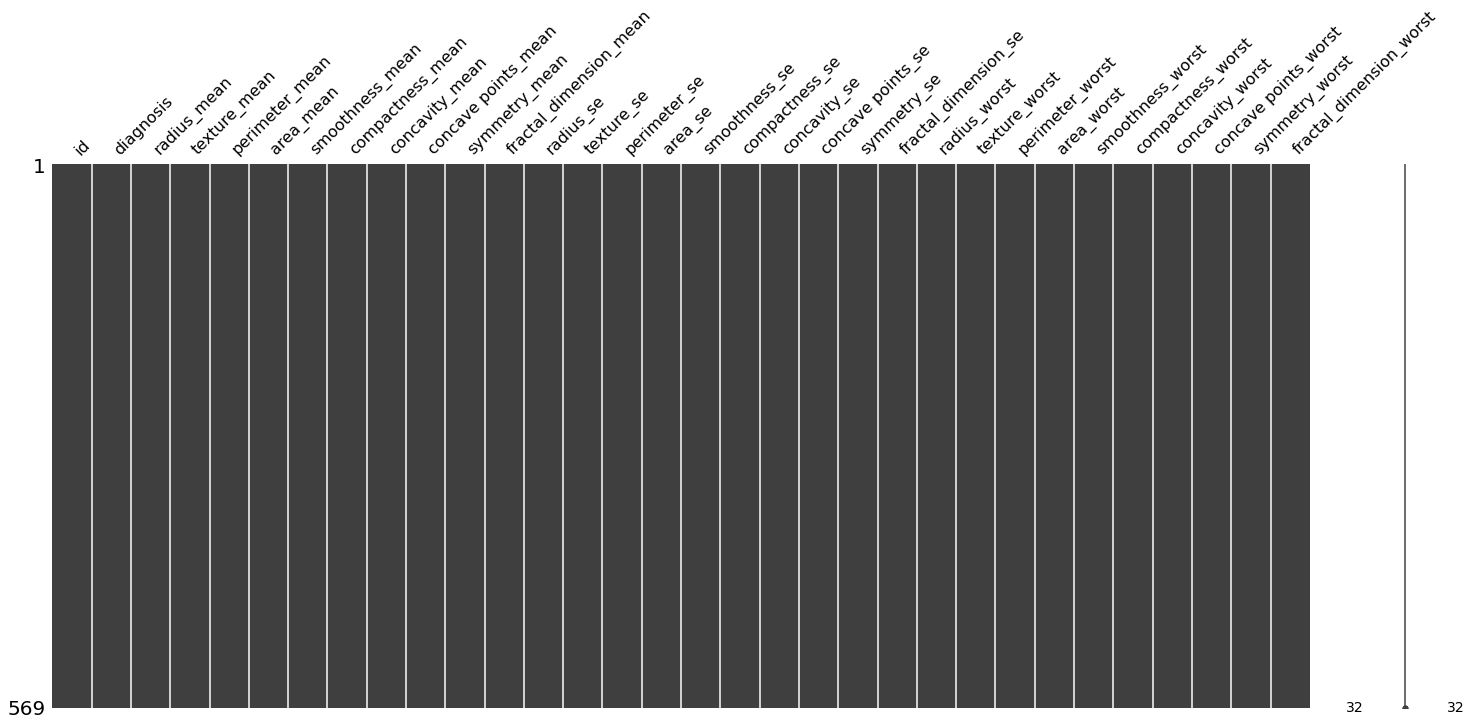

In [6]:
# Exploring missing values:
msno.matrix(data);

In [7]:
# count of missing values by feature:
data.isnull().sum()

id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

### Feature types:

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [9]:
# transform "diagnosis" into bool type:
diagnosis_dict = {'M':1, "B":0}
data["diagnosis"] = data["diagnosis"].map(diagnosis_dict)

Everything is ok.

<center><img width="300" src="https://s3.memeshappen.com/memes/Its-okay-We-got-this.jpg"></center>



## EDA:

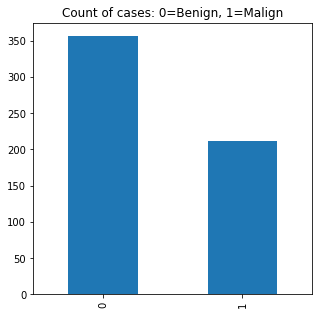

In [10]:
# is the dataset balanced?
fig_title = 'Count of cases: 0=Benign, 1=Malign'
data['diagnosis'].value_counts().plot(kind='bar', figsize=(5,5)).set_title(fig_title);


<center><img width="300" src="https://external-preview.redd.it/KccyhwbsmRR0ADdmpXkmnMnJfpp7cOBTTZQuLZ8V-to.jpg?auto=webp&s=bfc8c4af211d9c94dacb0090f435c750ff858e69"></center>



### Univariate distribution analysis:

radius_mean


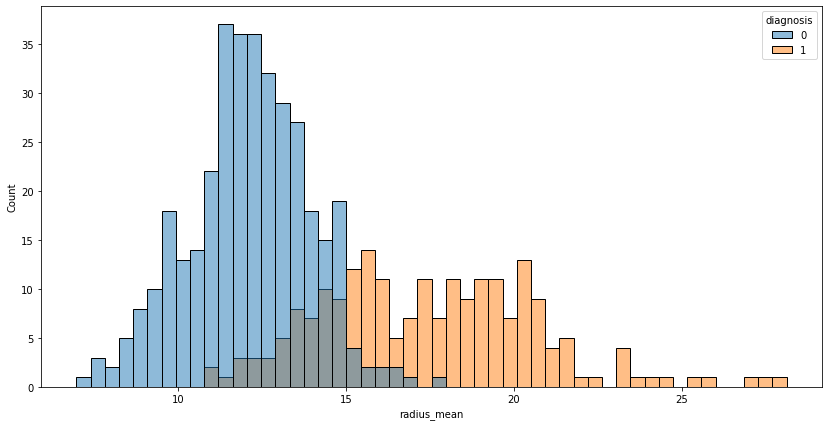

texture_mean


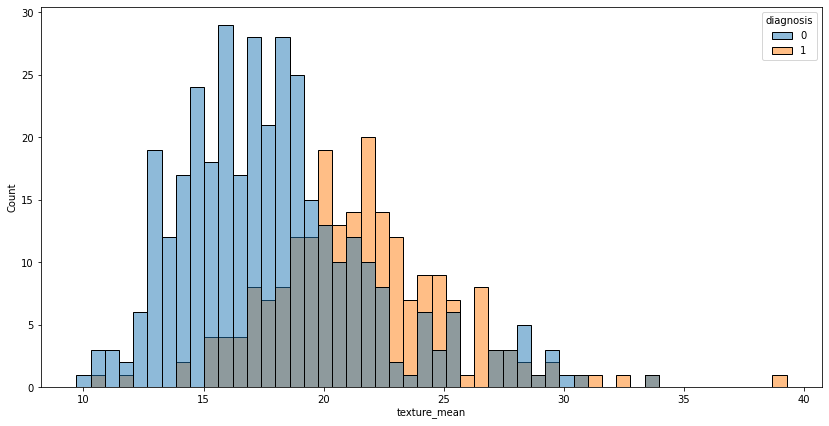

perimeter_mean


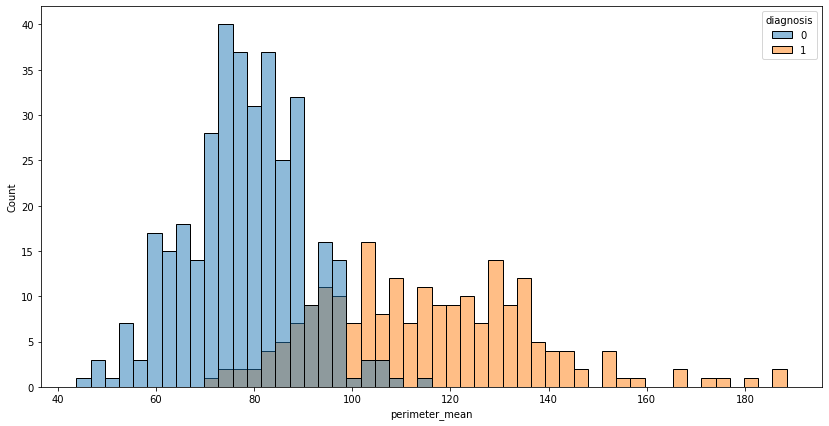

area_mean


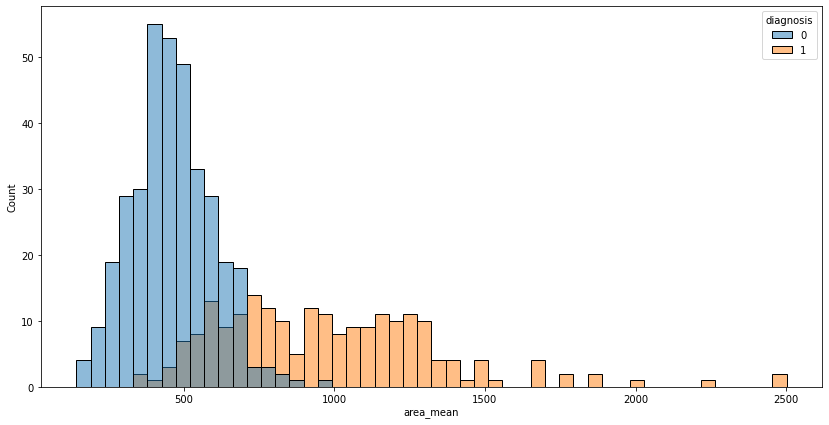

smoothness_mean


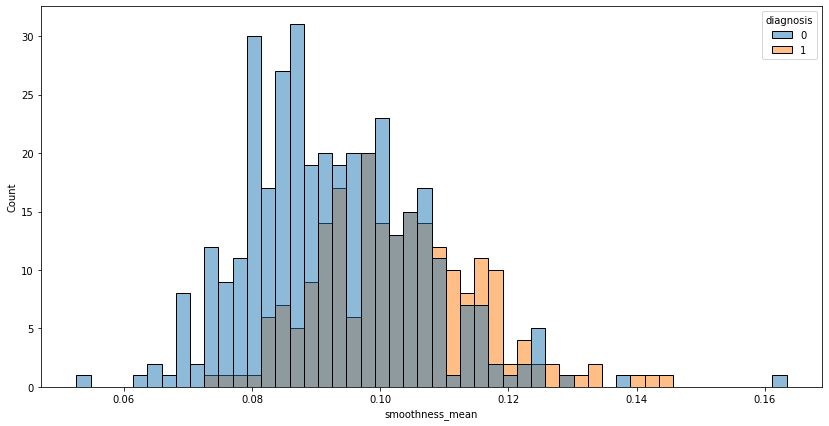

compactness_mean


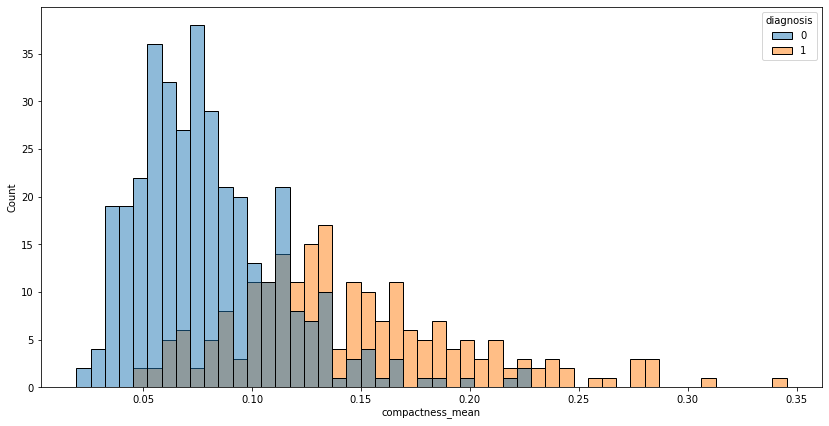

concavity_mean


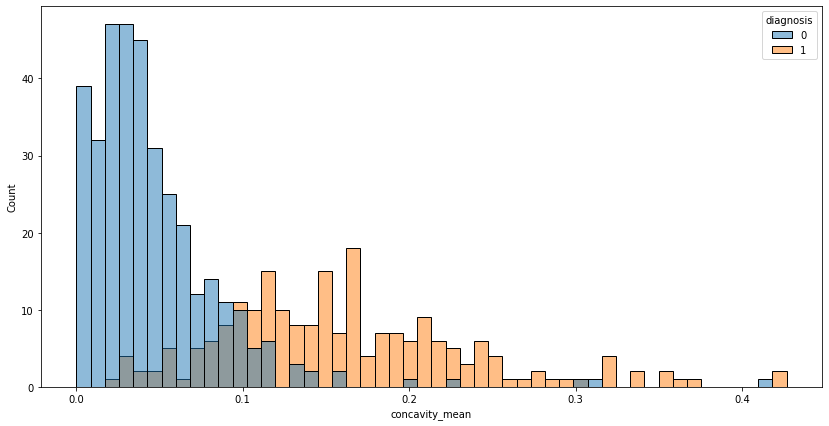

concave points_mean


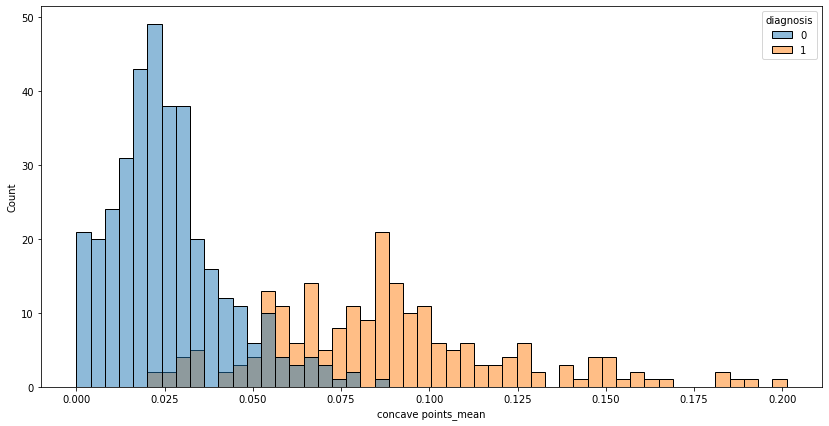

symmetry_mean


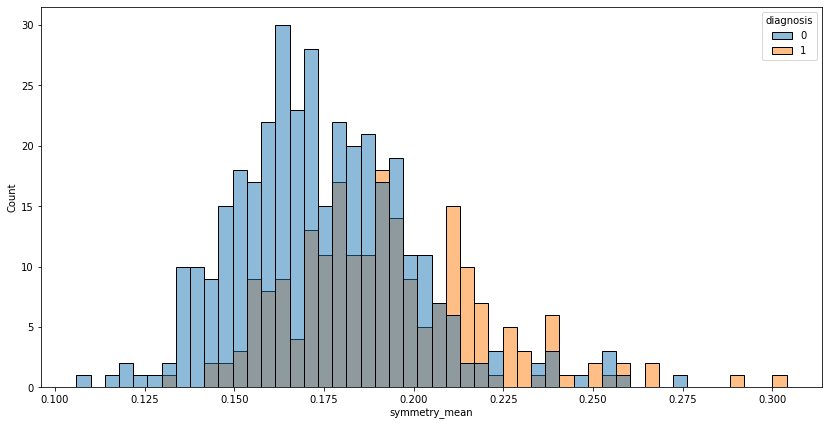

fractal_dimension_mean


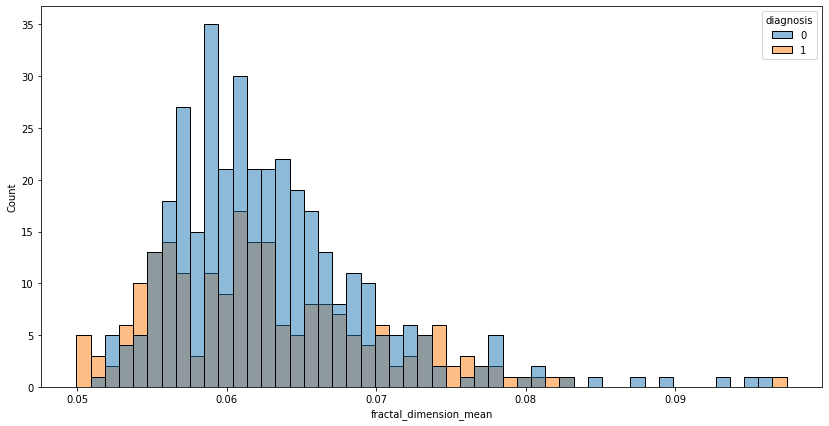

radius_se


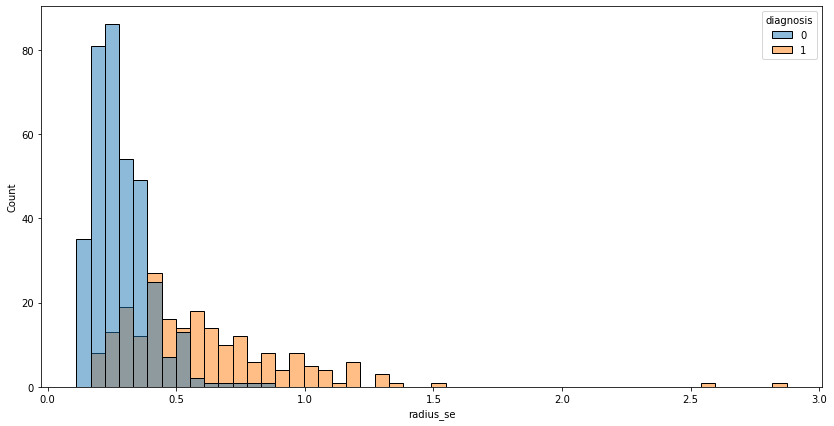

texture_se


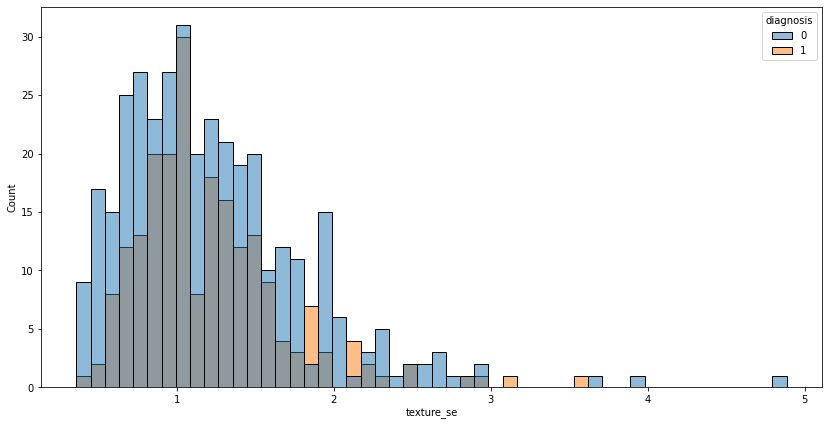

perimeter_se


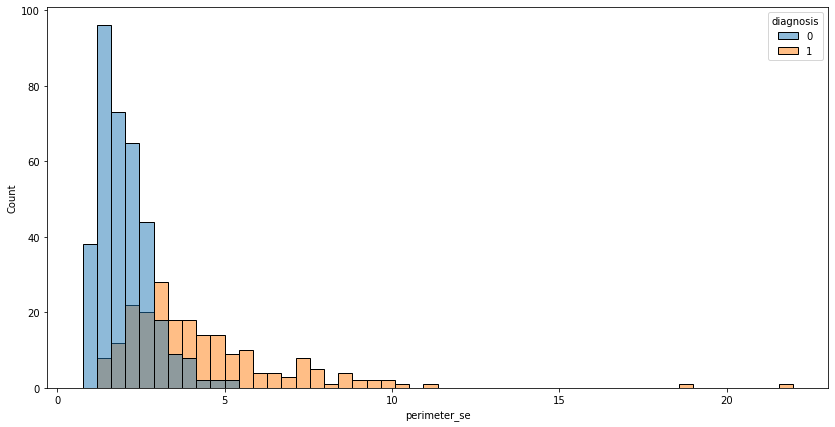

area_se


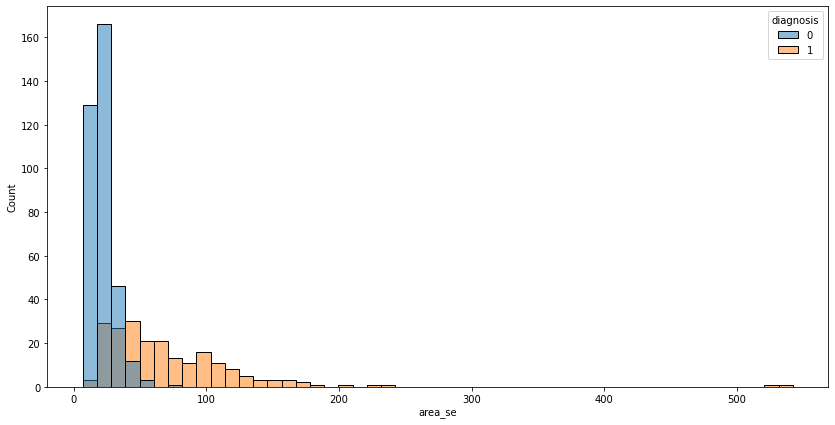

smoothness_se


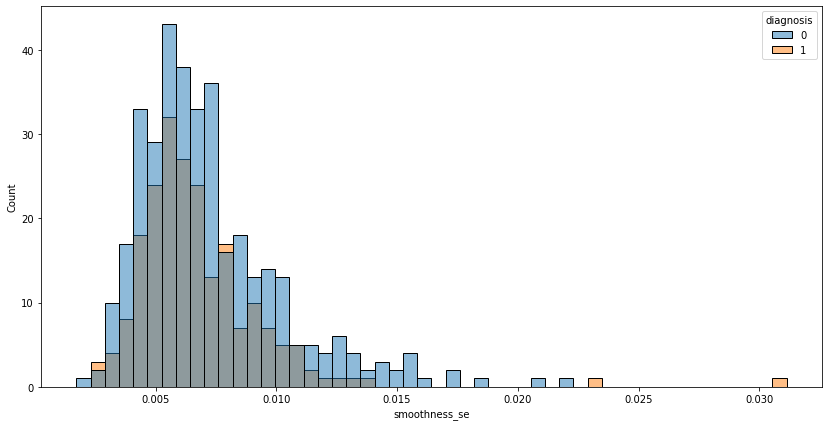

compactness_se


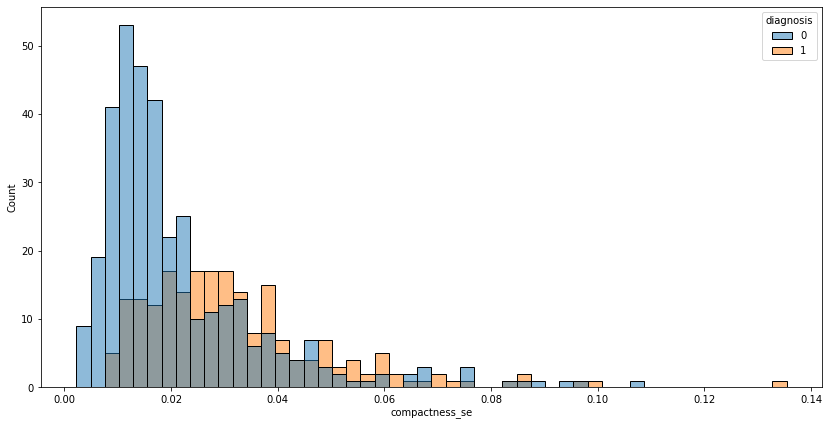

concavity_se


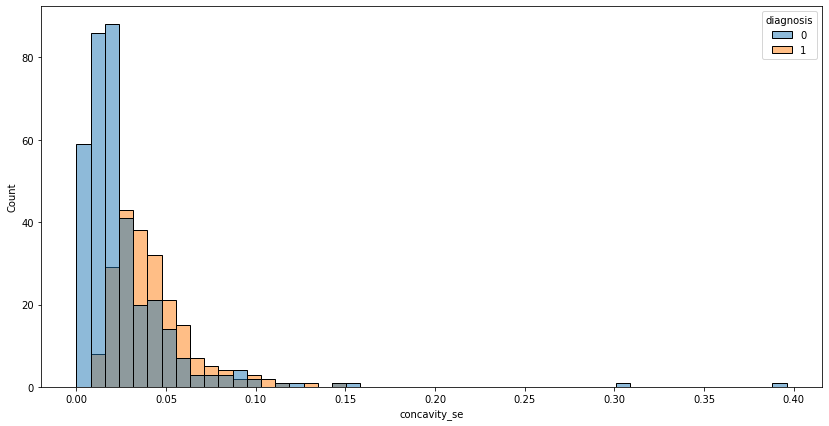

concave points_se


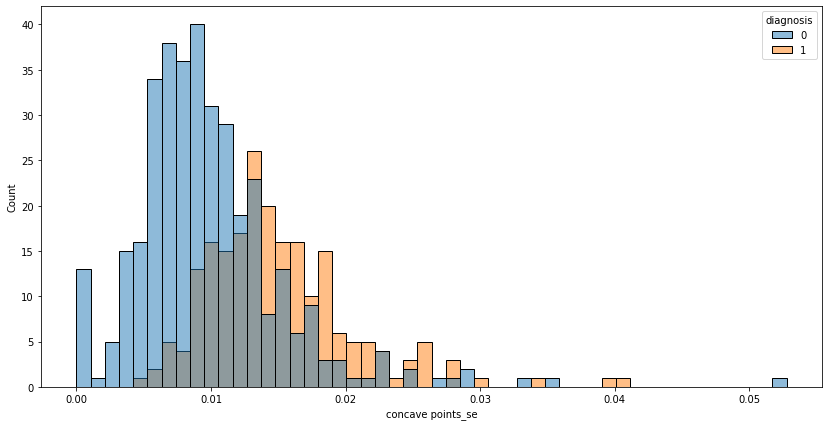

symmetry_se


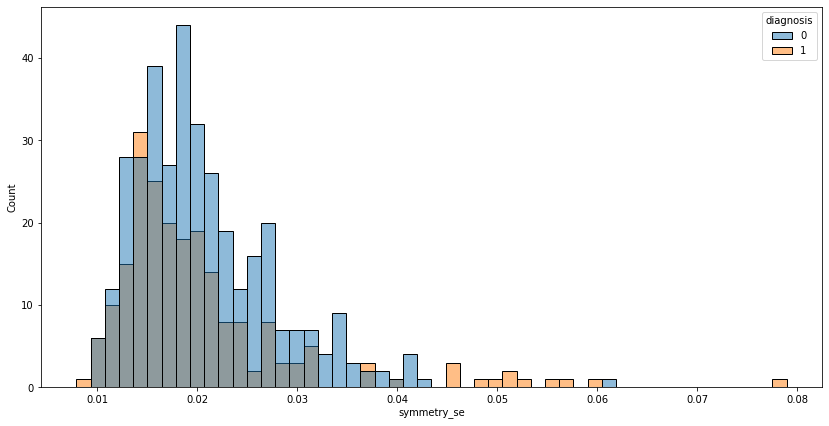

fractal_dimension_se


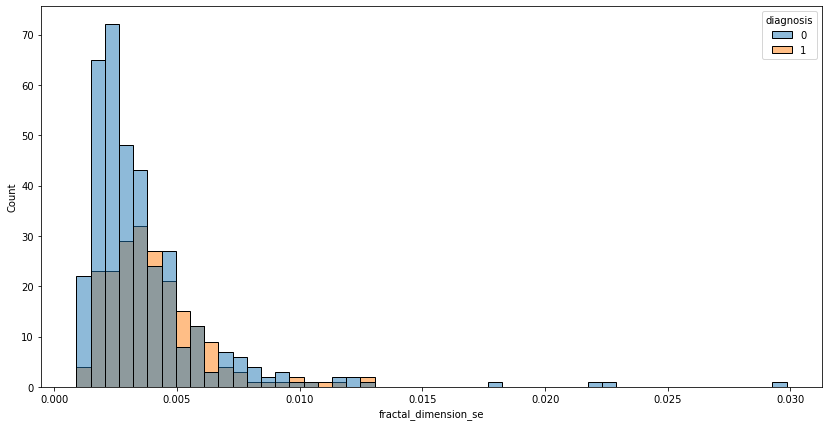

radius_worst


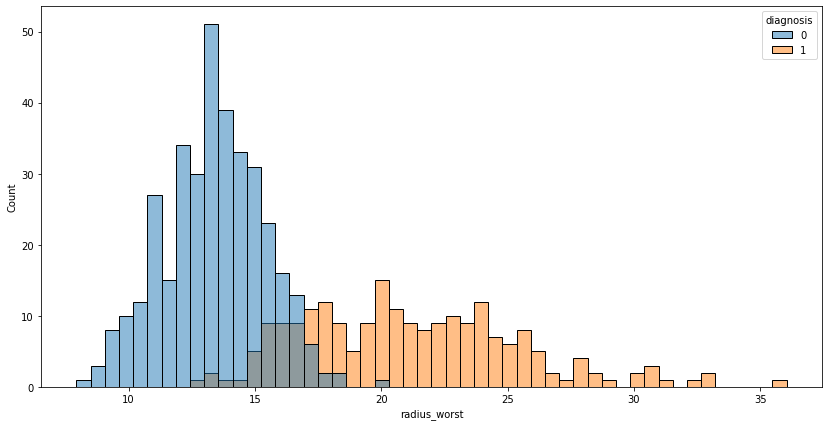

texture_worst


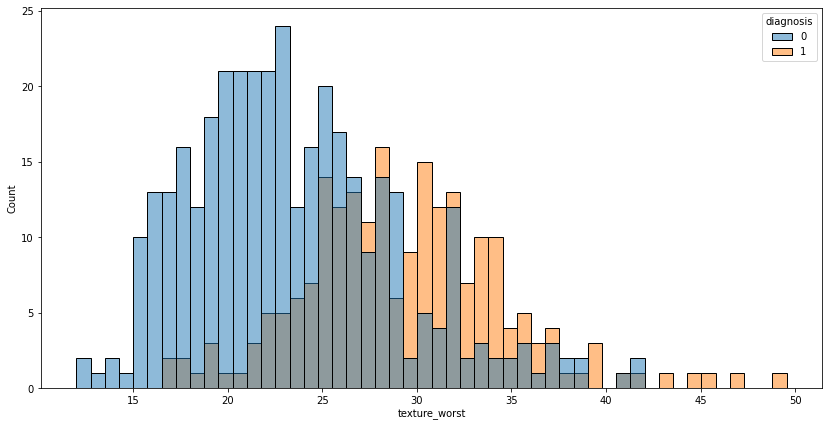

perimeter_worst


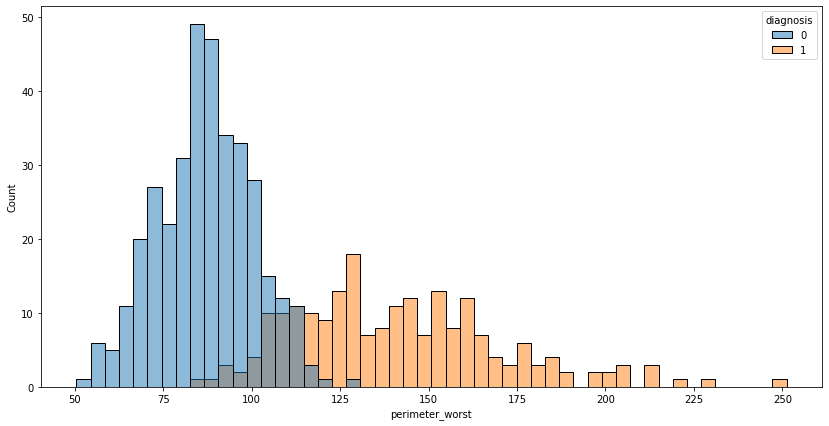

area_worst


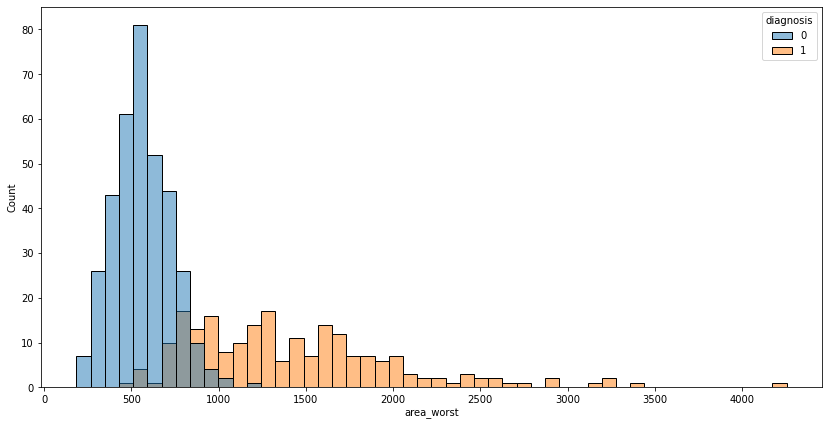

smoothness_worst


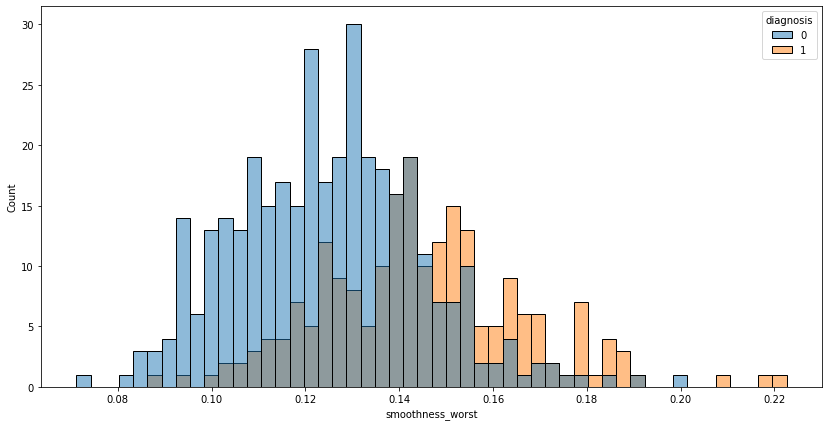

compactness_worst


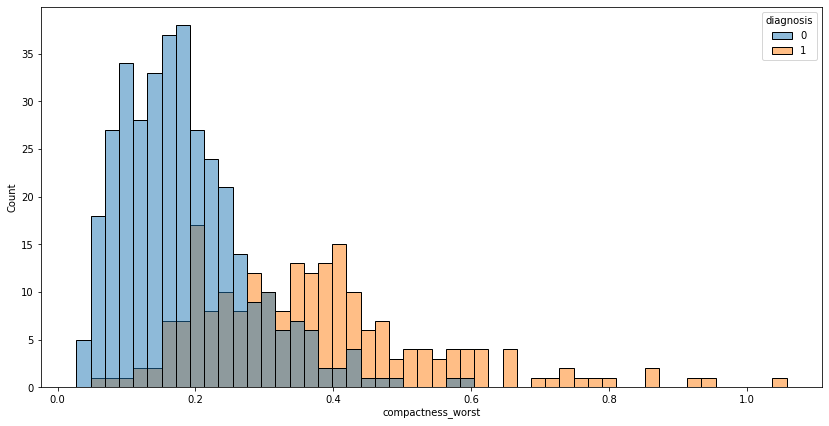

concavity_worst


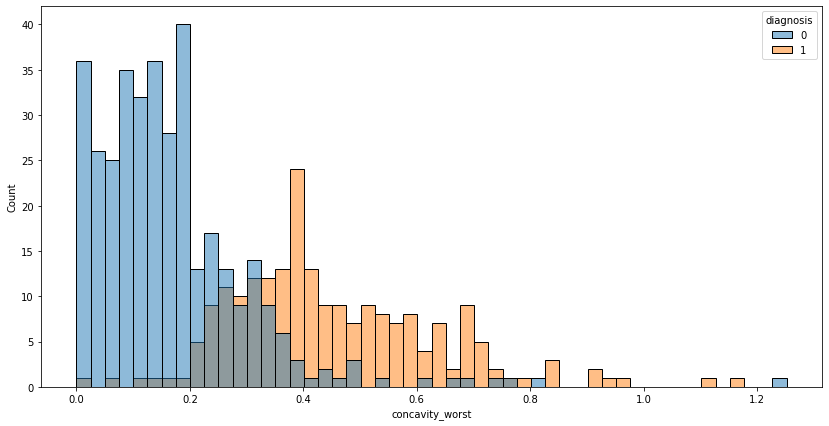

concave points_worst


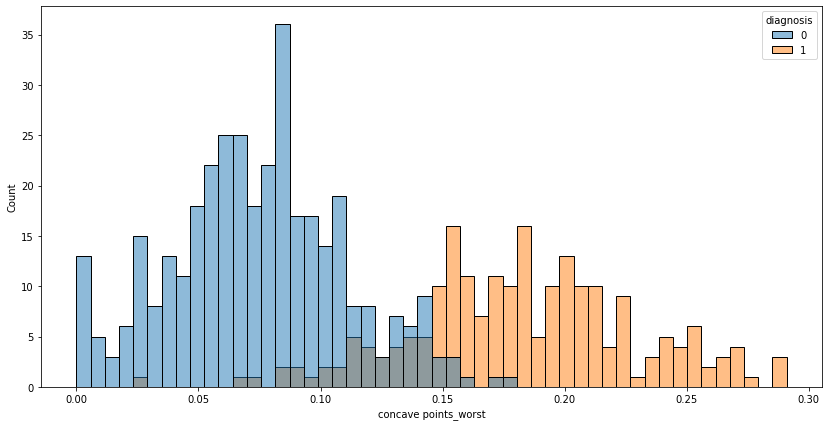

symmetry_worst


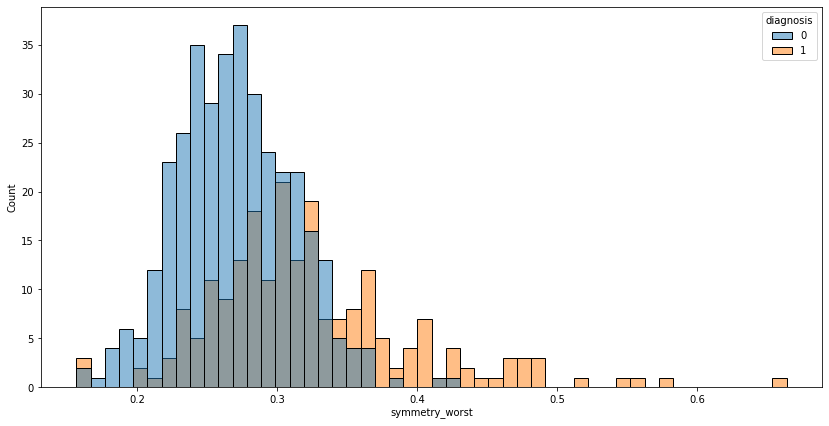

fractal_dimension_worst


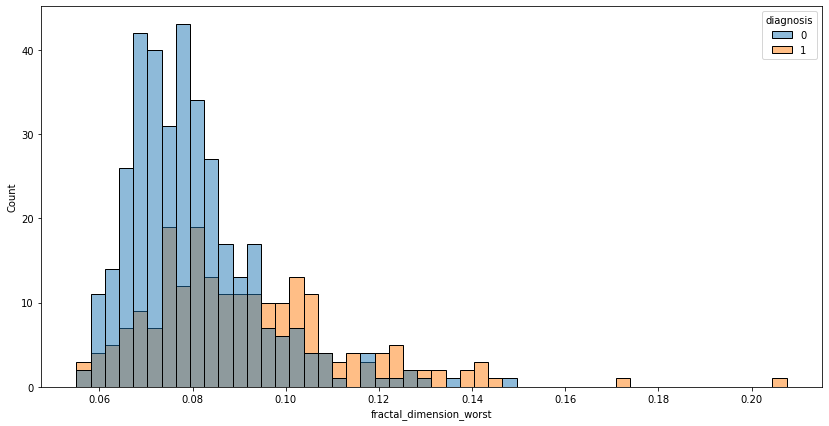

In [11]:
for var in data.columns[2:]:
  print(var)
  fig, ax = plt.subplots(figsize=(14,7))
  sns.histplot(data = data, x=var, bins=50, hue='diagnosis')
  plt.show()

The mean and std looks different for the malign and benign groups for some features. Let's find out which of them are with a statistical test:

In [39]:
from pingouin import ttest

def same_distribution_test(var):
  """
  This function test whether the distribution of a feature is
  the same or not between malign and benign tumors.

  input: feature included in the dataset.
  output ttest results.
  """
  # obtaining feature info:
  temp_df = data[['diagnosis', var]]
  # seperating according to diagnosis:
  temp_mal = temp_df[temp_df['diagnosis'] == 1][var]
  temp_ben = temp_df[temp_df['diagnosis'] == 0][var]
  # running t-test:
  results = ttest(temp_mal, temp_ben, confidence=0.99)
  # adding name of the feature to the test:
  results['feature'] = var
  return results



In [40]:
ttest_df = pd.DataFrame()
for var in data.columns[2:]:
  ttest_df = pd.concat([ttest_df, same_distribution_test(var)])

ttest_df = ttest_df.sort_values('p-val', ascending=True)
ttest_df

T         dof alternative         p-val  \
T-test  29.117659  360.422498   two-sided  1.061454e-96   
T-test  25.332210  264.694417   two-sided  1.032730e-72   
T-test  24.844810  265.545371   two-sided  3.127316e-71   
T-test  24.829745  265.482552   two-sided  3.556557e-71   
T-test  22.935314  285.405336   two-sided  1.023141e-66   
T-test  22.208798  289.712738   two-sided  1.684459e-64   
T-test  19.595726  360.535928   two-sided  9.852484e-59   
T-test  20.332425  296.434229   two-sided  3.742121e-58   
T-test  20.570814  229.906200   two-sided  4.937924e-54   
T-test  19.640990  244.793435   two-sided  3.284366e-52   
T-test  15.818246  310.391406   two-sided  9.607863e-42   
T-test  15.156872  285.620176   two-sided  1.749835e-38   
T-test  13.300706  237.953469   two-sided  1.491133e-30   
T-test  12.264826  447.182565   two-sided  5.198708e-30   
T-test  12.832763  233.796948   two-sided  6.868553e-29   
T-test  12.155556  216.218823   two-sided  2.983568e-26   
T-test  11.022087  463.072422   two-sided  3.019055e-25   
T-test  10.819553  412.569919   two-sided  3.474376e-24   
T-test  10.735452  455.452599   two-sided  4.042197e-24   
T-test   9.297355  466.214701   two-sided  5.573331e-19   
T-test   9.529504  290.625769   two-sided  6.562499e-19   
T-test   8.112198  406.090295   two-sided  5.957651e-15   
T-test   7.322730  315.231175   two-sided  2.041904e-12   
T-test   7.082641  403.034190   two-sided  6.341807e-12   
T-test   6.916305  561.406384   two-sided  1.266514e-11   
T-test   2.036236  553.223796   two-sided  4.220238e-02   
T-test  -1.622869  463.683033   two-sided  1.052970e-01   
T-test  -0.296866  403.643570   two-sided  7.667216e-01   
T-test  -0.207865  511.677972   two-sided  8.354171e-01   
T-test  -0.142055  333.275271   two-sided  8.871223e-01   

                                                   CI99%   cohen-d  \
T-test        [0.09820654876055947, 0.11737938480531972]  2.692647   
T-test           [48.79637883914704, 59.932404787511196]  2.598237   
T-test        [0.05576965074093634, 0.06877553693413369]  2.545225   
T-test             [6.94468463397393, 8.565335766639146]  2.543903   
T-test            [33.07380729774235, 41.50613509430877]  2.289516   
T-test           [4.6956208234678085, 5.936991934843064]  2.205463   
T-test        [0.24678922613444257, 0.32194646056287773]  1.811931   
T-test         [0.1000899225692731, 0.12934426937618435]  2.003275   
T-test            [754.3709752390183, 972.4027867185957]  2.230242   
T-test            [447.4382386061648, 583.7341994256522]  2.075651   
T-test       [0.054436248329646504, 0.07577007401061032]  1.534574   
T-test        [0.15927682104878718, 0.22502628845916695]  1.512636   
T-test          [0.26155159898602454, 0.388448789471245]  1.421678   
T-test           [4.5791534348317295, 7.027121603485478]  1.060512   
T-test          [1.8533694876512077, 2.7938464258840168]  1.381603   
T-test           [40.519013721586006, 62.55550068040118]  1.353439   
T-test           [2.8241995462062257, 4.556087965024685]  0.942262   
T-test        [0.015129509975909616, 0.0246419701255649]  0.959564   
T-test     [0.003949219268172585, 0.0064564188059249815]  0.922779   
T-test      [0.007521886397201736, 0.013319800617226691]  0.793031   
T-test        [0.03874098996912598, 0.06770298233677743]  0.945306   
T-test       [0.01274988173531319, 0.024696053997470466]  0.722990   
T-test       [0.007809977267944019, 0.01636578273417003]  0.706776   
T-test     [0.0068807852200606845, 0.014805051971419687]  0.632708   
T-test       [0.00991264000847749, 0.021741907710987655]  0.541585   
T-test  [-0.00011484872135834154, 0.0009675575211046557]  0.161477   
T-test  [-0.0010785076505255091, 0.00024689240820216626]  0.138676   
T-test   [-0.0018201794099587858, 0.0014455781732376687]  0.026507   
T-test        [-0.1271993718049506, 0.10826839299833343]  0.017144   
T-test      [-0.002143113910554525, 0.00192030235196883]  0.013465   

              B

The following features won't add relevant information to our analysis as they share the same distribution between malign and benign cases according to the t-test results:
```
fractal_dimension_se
smoothness_se
fractal_dimension_mean
texture_se
symmetry_se
```
We can see this with their T-statistical value, p-score, and confidence interval:


In [41]:
ttest_df[['feature', 'T', 'p-val', 'CI99%']].reset_index(drop=True).tail(5)

feature         T     p-val  \
25    fractal_dimension_se  2.036236  0.042202   
26           smoothness_se -1.622869  0.105297   
27  fractal_dimension_mean -0.296866  0.766722   
28              texture_se -0.207865  0.835417   
29             symmetry_se -0.142055  0.887122   

                                               CI99%  
25  [-0.00011484872135834154, 0.0009675575211046557]  
26  [-0.0010785076505255091, 0.00024689240820216626]  
27   [-0.0018201794099587858, 0.0014455781732376687]  
28        [-0.1271993718049506, 0.10826839299833343]  
29      [-0.002143113910554525, 0.00192030235196883]

In [48]:
# let's create a list whit the relevant features so far:
columns_to_drop = list(ttest_df[['feature', 'T', 'p-val', 'CI99%']].reset_index(drop=True).tail(5)['feature'])
features_to_keep = [x for x in data.columns[2:] if x not in columns_to_drop]
features_to_keep

['radius_mean',
 'texture_mean',
 'perimeter_mean',
 'area_mean',
 'smoothness_mean',
 'compactness_mean',
 'concavity_mean',
 'concave points_mean',
 'symmetry_mean',
 'radius_se',
 'perimeter_se',
 'area_se',
 'compactness_se',
 'concavity_se',
 'concave points_se',
 'radius_worst',
 'texture_worst',
 'perimeter_worst',
 'area_worst',
 'smoothness_worst',
 'compactness_worst',
 'concavity_worst',
 'concave points_worst',
 'symmetry_worst',
 'fractal_dimension_worst']

### HeatMap of correlations:

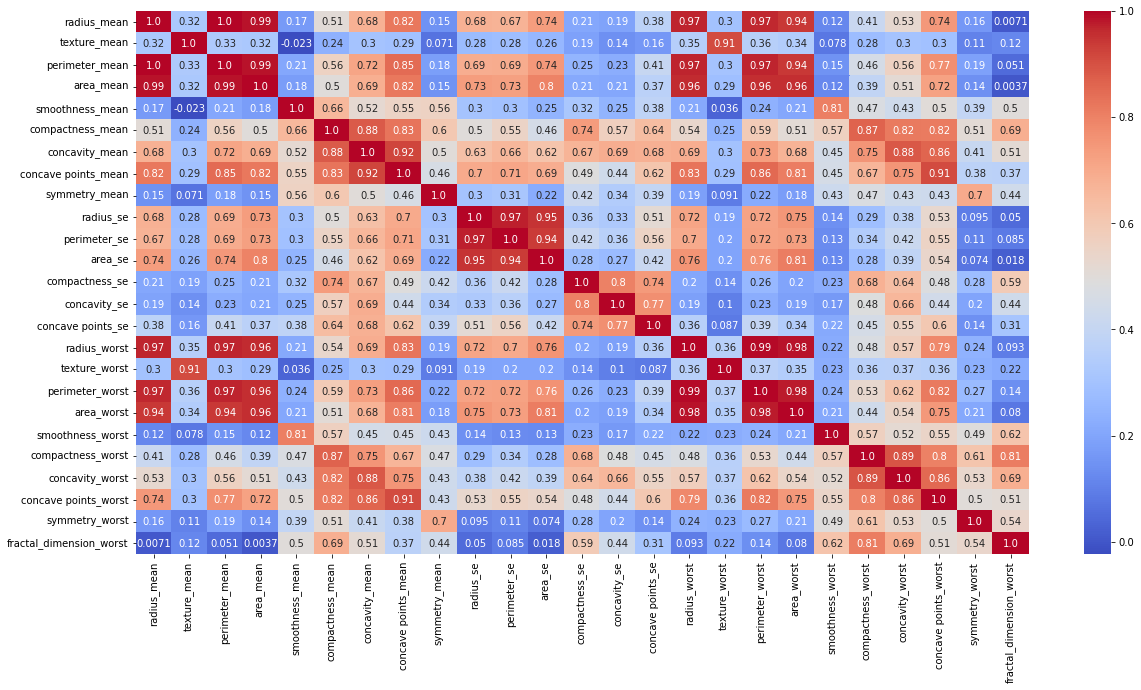

In [57]:
plt.subplots(figsize=(20,10))
sns.heatmap(data[features_to_keep].corr(), annot=True, fmt=".2", cmap='coolwarm')
plt.show()

Some features are highly correlated between them, which is not desirable at all before running linear regression models. We might consider drop them.

In [72]:
high_correlations = data[features_to_keep].corr()[data[features_to_keep].corr()>0.9]
high_correlations

radius_mean  texture_mean  perimeter_mean  area_mean  \
radius_mean                 1.000000           NaN        0.997855   0.987357   
texture_mean                     NaN      1.000000             NaN        NaN   
perimeter_mean              0.997855           NaN        1.000000   0.986507   
area_mean                   0.987357           NaN        0.986507   1.000000   
smoothness_mean                  NaN           NaN             NaN        NaN   
compactness_mean                 NaN           NaN             NaN        NaN   
concavity_mean                   NaN           NaN             NaN        NaN   
concave points_mean              NaN           NaN             NaN        NaN   
symmetry_mean                    NaN           NaN             NaN        NaN   
radius_se                        NaN           NaN             NaN        NaN   
perimeter_se                     NaN           NaN             NaN        NaN   
area_se                          NaN           NaN             NaN        NaN   
compactness_se                   NaN           NaN             NaN        NaN   
concavity_se                     NaN           NaN             NaN        NaN   
concave points_se                NaN           NaN             NaN        NaN   
radius_worst                0.969539           NaN        0.969476   0.962746   
texture_worst                    NaN      0.912045             NaN        NaN   
perimeter_worst             0.965137           NaN        0.970387   0.959120   
area_worst                  0.941082           NaN        0.941550   0.959213   
smoothness_worst                 NaN           NaN             NaN        NaN   
compactness_worst                NaN           NaN             NaN        NaN   
concavity_worst                  NaN           NaN             NaN        NaN   
concave points_worst             NaN           NaN             NaN        NaN   
symmetry_worst                   NaN           NaN             NaN        NaN   
fractal_dimension_worst          NaN           NaN             NaN        NaN   

                         smoothness_mean  compactness_mean  concavity_mean  \
radius_mean                          NaN               NaN             NaN   
texture_mean                         NaN               NaN             NaN   
perimeter_mean                       NaN               NaN             NaN   
area_mean                            NaN               NaN             NaN   
smoothness_mean                      1.0               NaN             NaN   
compactness_mean                     NaN               1.0             NaN   
concavity_mean                       NaN               NaN        1.000000   
concave points_mean                  NaN               NaN        0.921391   
symmetry_mean                        NaN               NaN             NaN   
radius_se                            NaN               NaN             NaN   
perimeter_se                         NaN               NaN             NaN   
area_se                              NaN               NaN             NaN   
compactness_se                       NaN               NaN             NaN   
concavity_se                         NaN               NaN             NaN   
concave points_se                    NaN               NaN             NaN   
radius_worst                         NaN               NaN             NaN   
texture_worst                        NaN               NaN             NaN   
perimeter_worst                      NaN               NaN             NaN   
area_worst                           NaN               NaN             NaN   
smoothness_worst                     NaN               NaN             NaN   
compactness_worst                    NaN               NaN             NaN   
concavity_worst                      NaN               NaN             NaN   
concave points_worst                 NaN               NaN             NaN   
symmetry_worst                       NaN      

In [83]:
def correlated_features(var):
  """
  This function identifies the features with linear correlations
  higher than 0.9.
  
  input: feature name.
  output: dataframe with the correspondent correlation and feature name.
  """
  # removing features with less than 0.9 coef of correlation
  temp_df = high_correlations[[var]].dropna()
  temp_df = temp_df.reset_index()
  # removing the feature itself as its coef is 1
  temp_df = temp_df[temp_df['index'] != var]
  # adding feature name as a new column to identify origin of correlation
  temp_df['feature'] = var
  # renaming columns
  temp_df.columns = ['feature_1', 'correlation', 'feature_2']
  # rearranging columns
  temp_df = temp_df[['feature_1', 'feature_2', 'correlation']]

  return temp_df

In [122]:
corr_df = pd.DataFrame()
for var in features_to_keep:
  corr_df = pd.concat([corr_df, correlated_features(var)])

corr_df = corr_df.reset_index(drop=True)
corr_df = corr_df.sort_values('feature_1', ascending=True).drop_duplicates(subset=['correlation'])
corr_df.reset_index(drop=True)

feature_1             feature_2  correlation
0             area_mean           radius_mean     0.987357
1             area_mean            area_worst     0.959213
2             area_mean       perimeter_worst     0.959120
3             area_mean        perimeter_mean     0.986507
4             area_mean          radius_worst     0.962746
5               area_se             radius_se     0.951830
6               area_se          perimeter_se     0.937655
7            area_worst       perimeter_worst     0.977578
8            area_worst           radius_mean     0.941082
9            area_worst          radius_worst     0.984015
10           area_worst        perimeter_mean     0.941550
11  concave points_mean        concavity_mean     0.921391
12  concave points_mean  concave points_worst     0.910155
13       perimeter_mean           radius_mean     0.997855
14       perimeter_mean       perimeter_worst     0.970387
15       perimeter_mean          radius_worst     0.969476
16         perimeter_se             radius_se     0.972794
17      perimeter_worst           radius_mean     0.965137
18      perimeter_worst          radius_worst     0.993708
19          radius_mean          radius_worst     0.969539
20         texture_mean         texture_worst     0.912045

As these coefs of correlations are high they might not give additional valuable information if all of them are included, so we might think of removing them.

In [114]:
high_correlated_features = [x for x in corr_df['feature_2'].unique()]
high_correlated_features

['radius_mean',
 'area_worst',
 'perimeter_worst',
 'perimeter_mean',
 'radius_worst',
 'radius_se',
 'perimeter_se',
 'concavity_mean',
 'concave points_worst',
 'texture_worst']

In [115]:
features_to_keep_2 = [x for x in features_to_keep if x not in high_correlated_features]
features_to_keep_2

['texture_mean',
 'area_mean',
 'smoothness_mean',
 'compactness_mean',
 'concave points_mean',
 'symmetry_mean',
 'area_se',
 'compactness_se',
 'concavity_se',
 'concave points_se',
 'smoothness_worst',
 'compactness_worst',
 'concavity_worst',
 'symmetry_worst',
 'fractal_dimension_worst']

The following heatmap contains the variables with correlation coef lower than 0.9 between them.

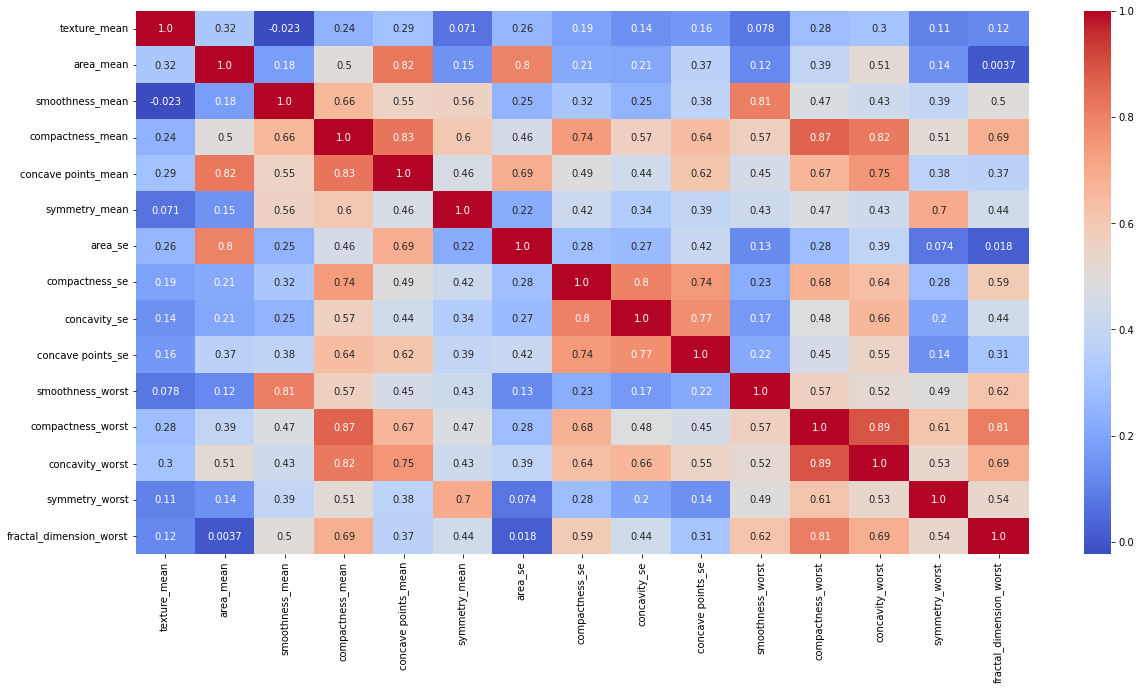

In [116]:
plt.subplots(figsize=(20,10))
sns.heatmap(data[features_to_keep_2].corr(), annot=True, fmt=".2", cmap='coolwarm')
plt.show()

### Multivariate distribution analysis:

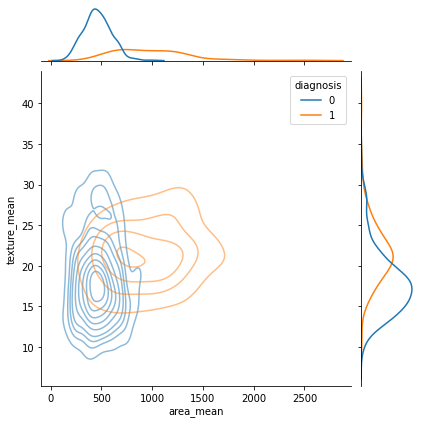

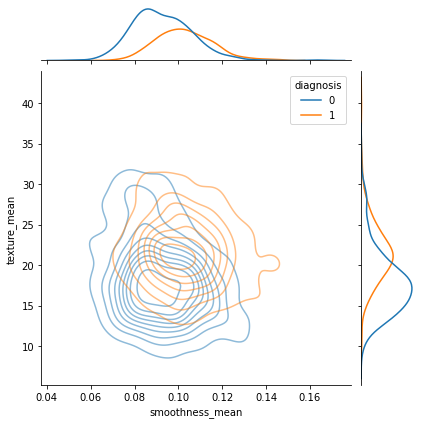

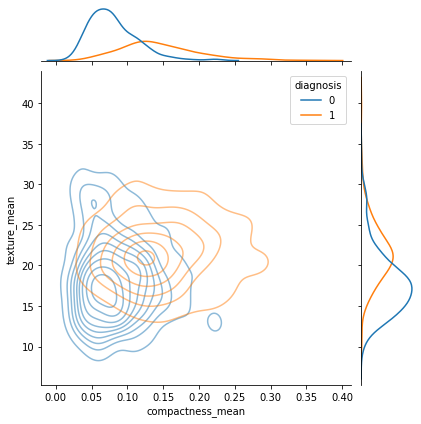

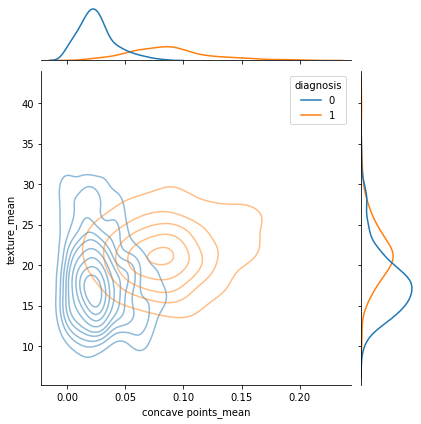

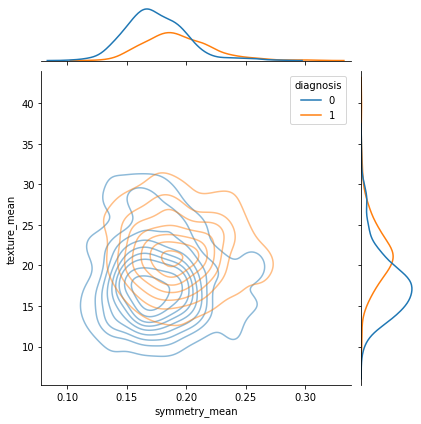

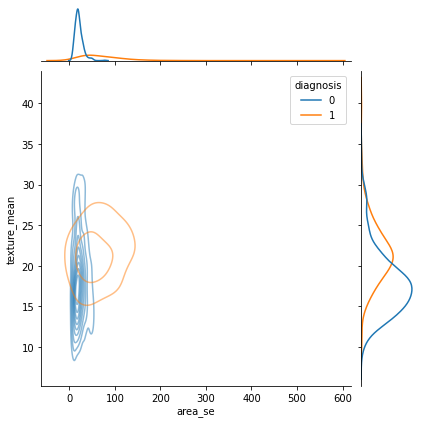

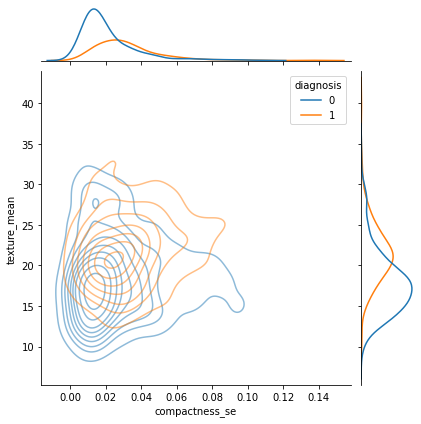

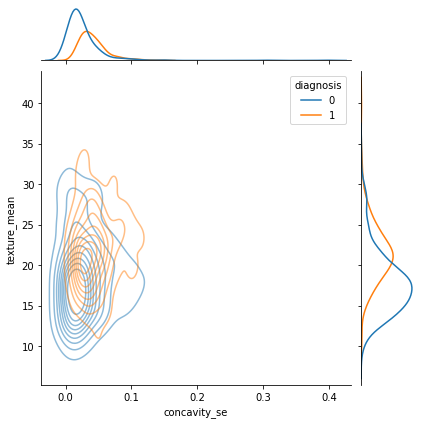

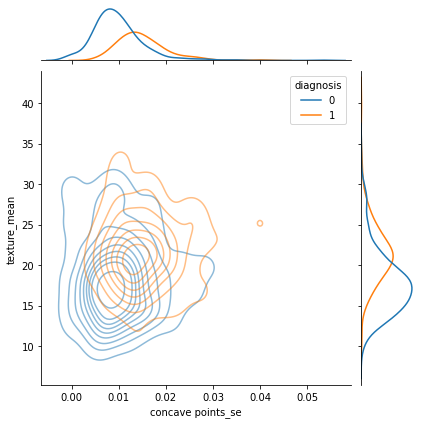

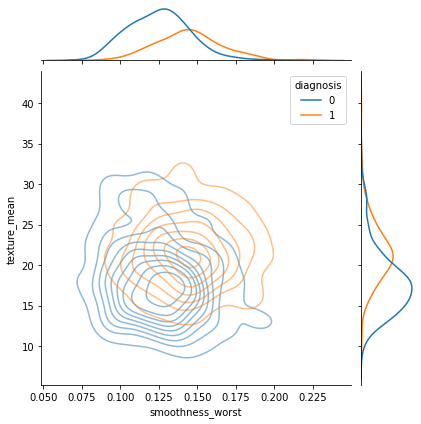

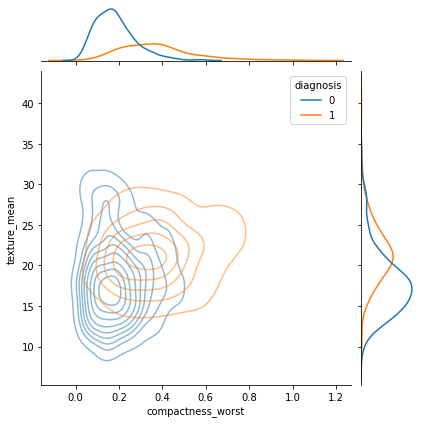

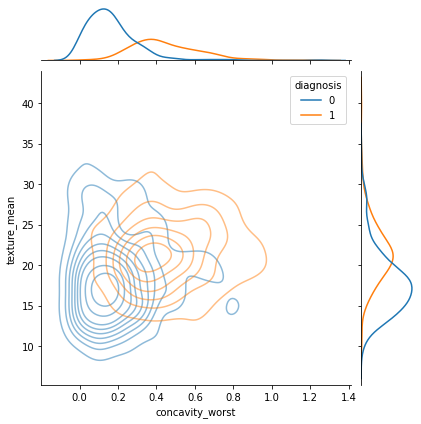

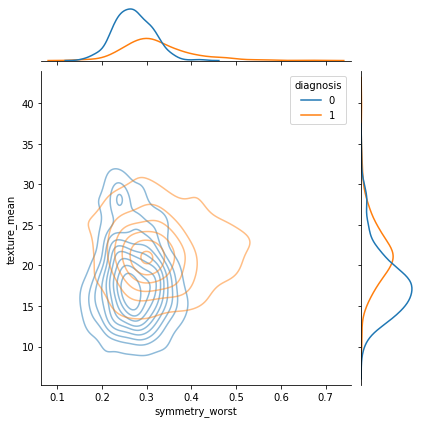

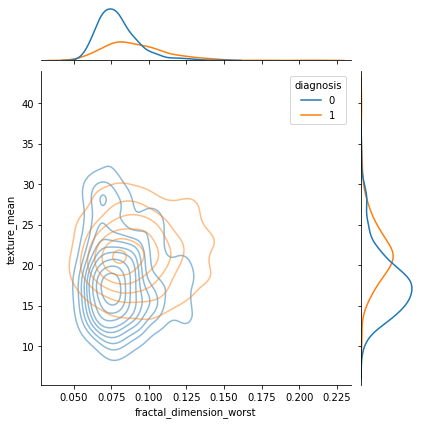

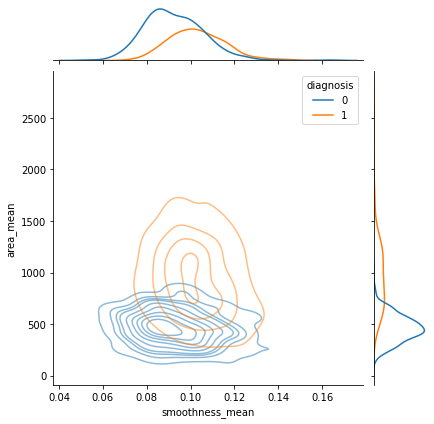

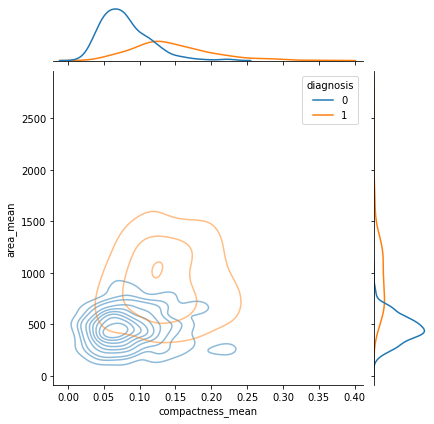

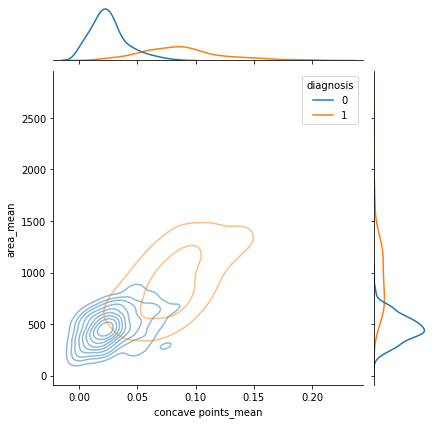

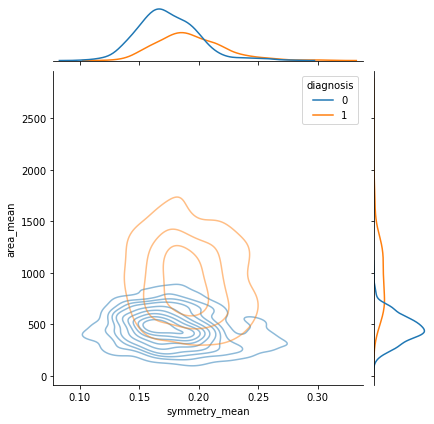

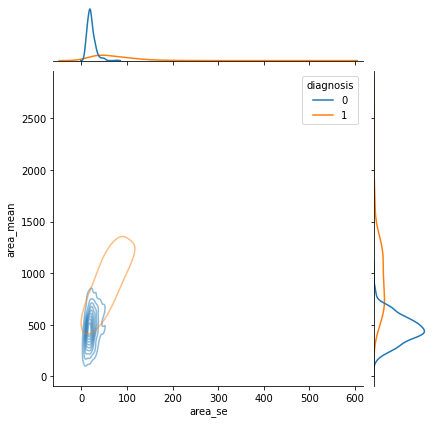

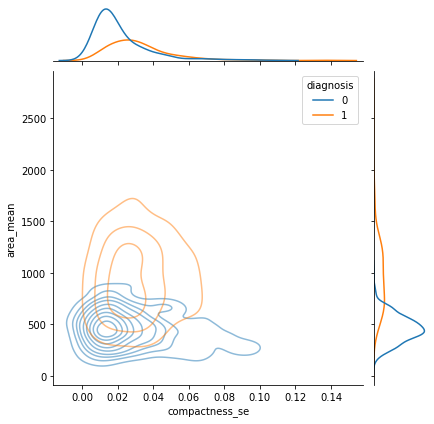

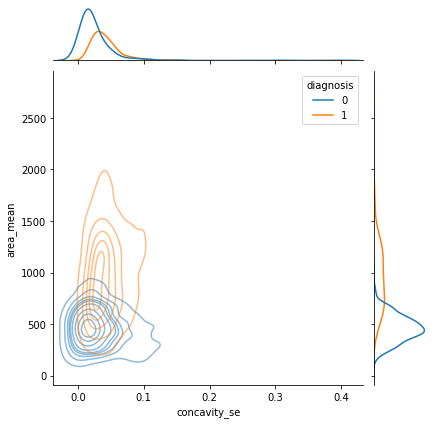

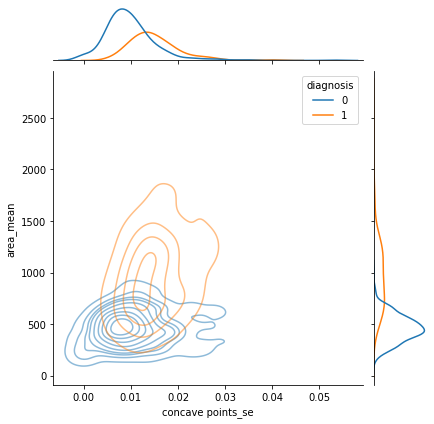

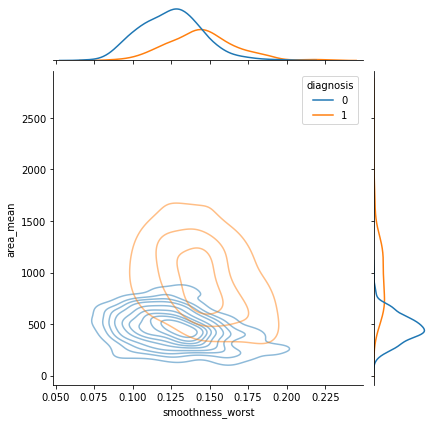

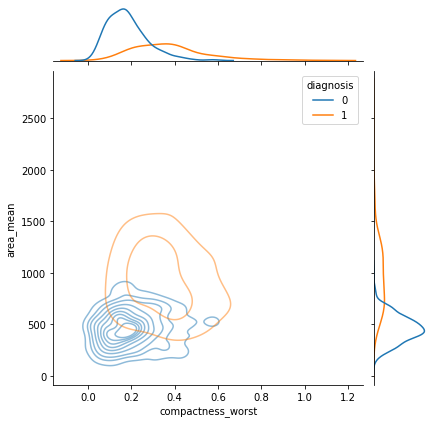

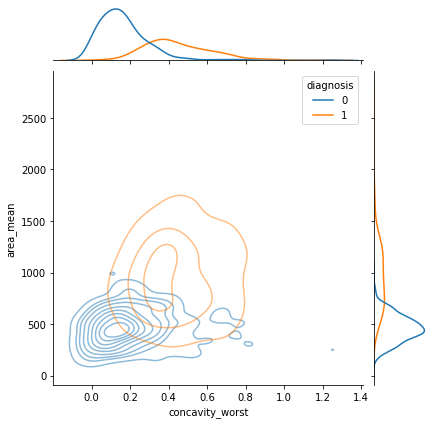

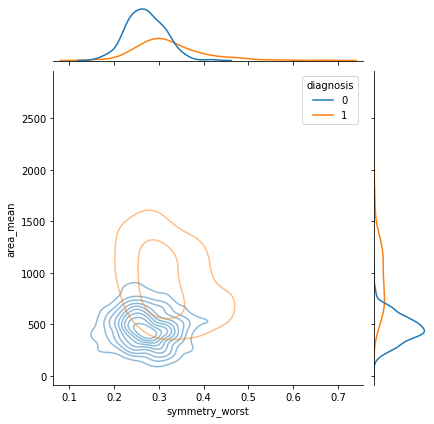

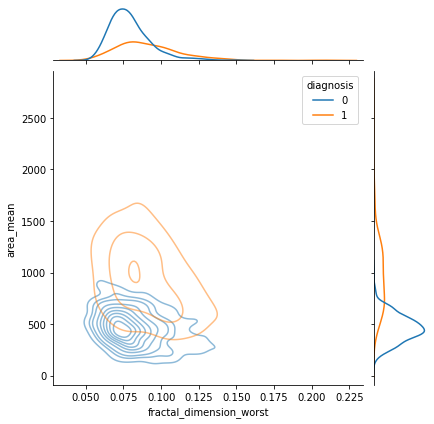

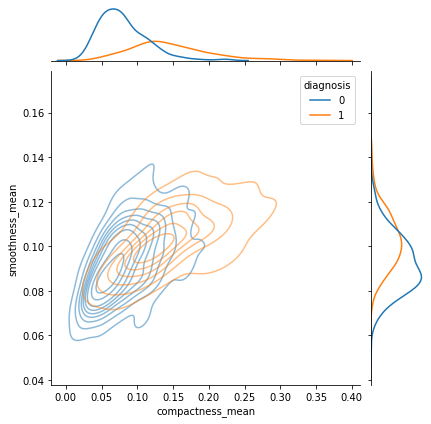

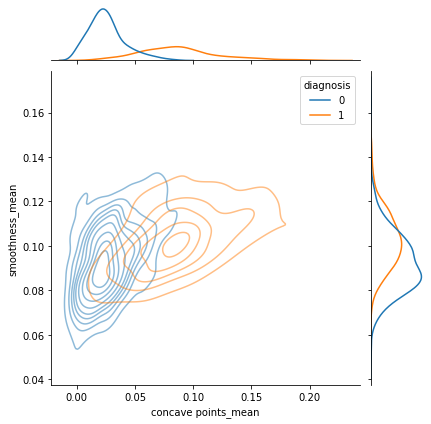

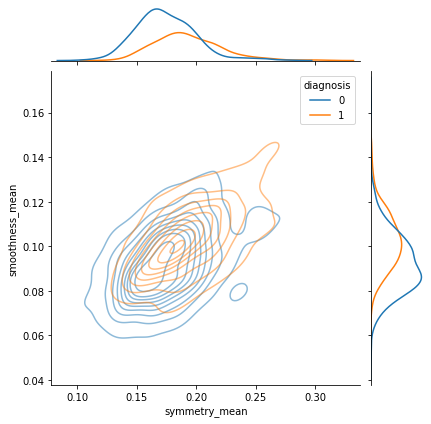

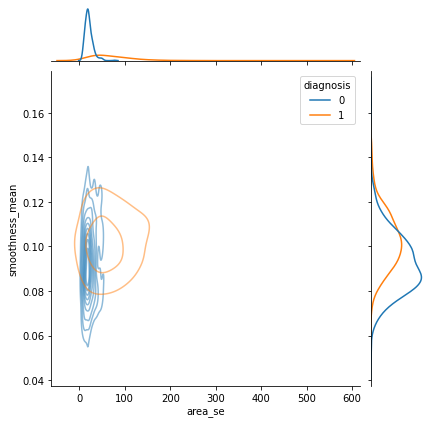

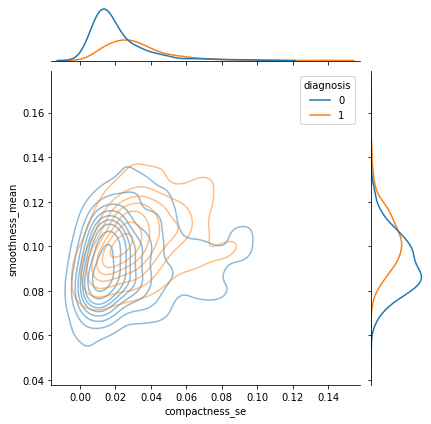

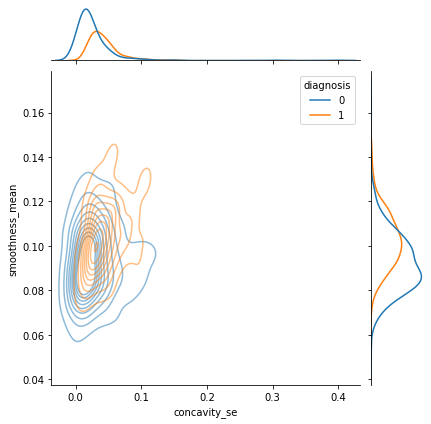

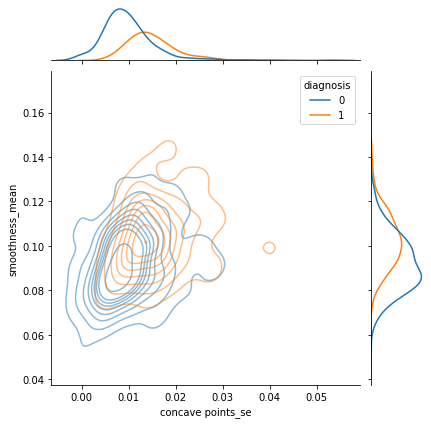

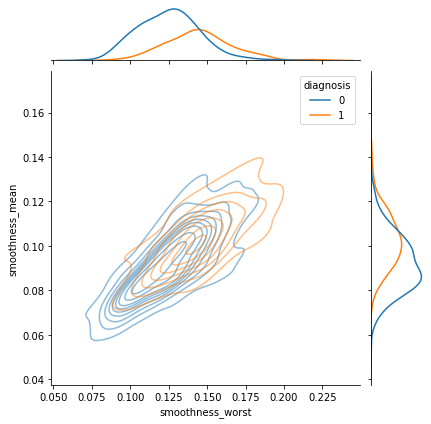

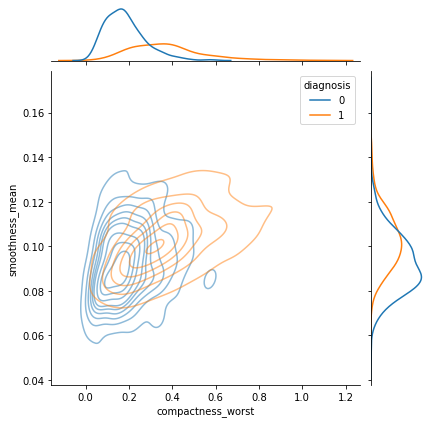

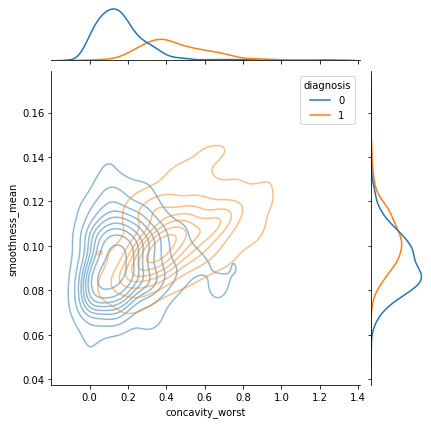

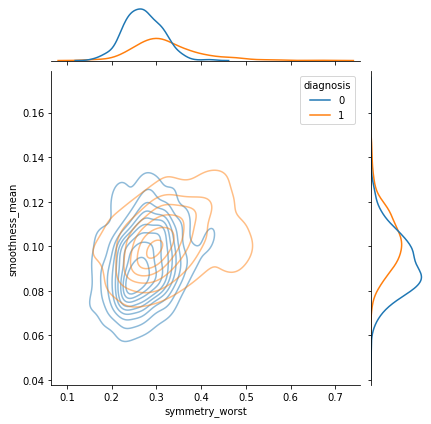

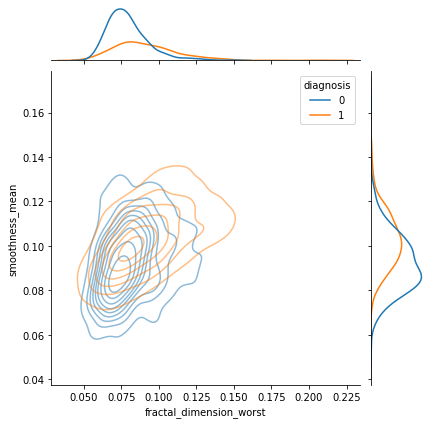

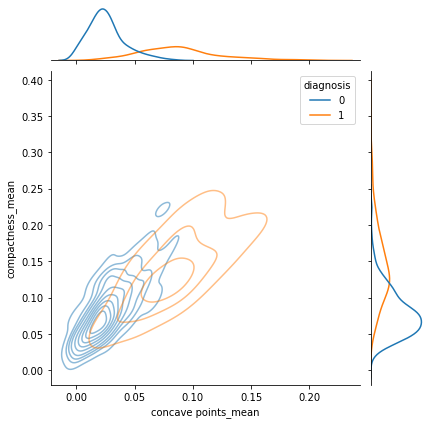

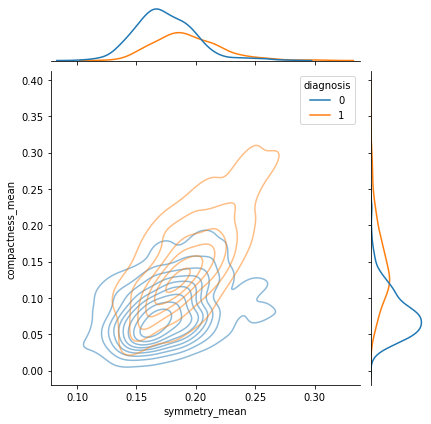

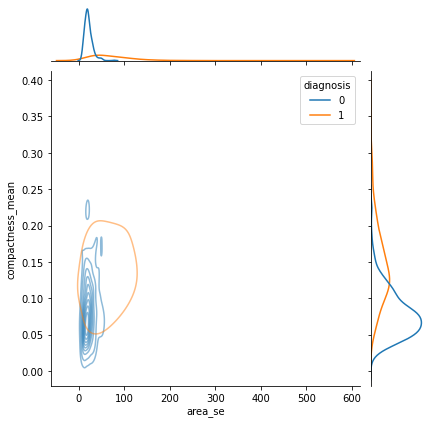

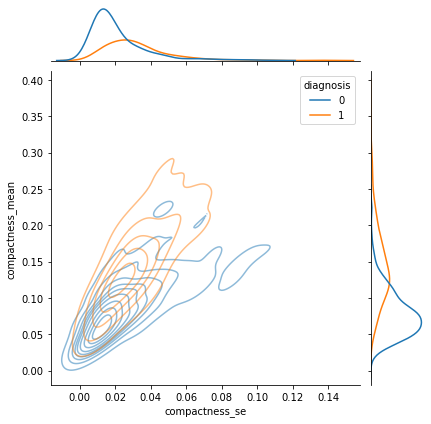

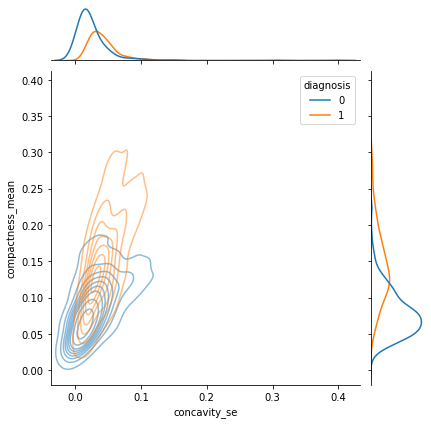

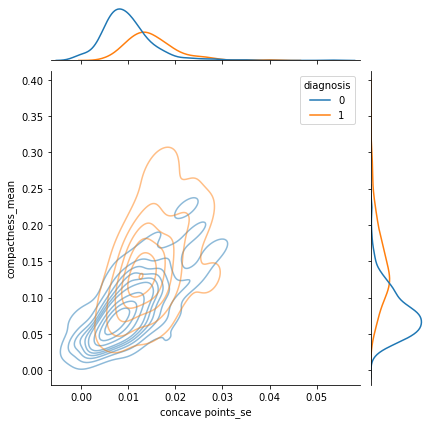

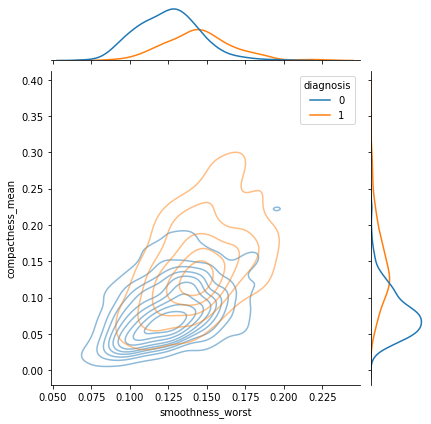

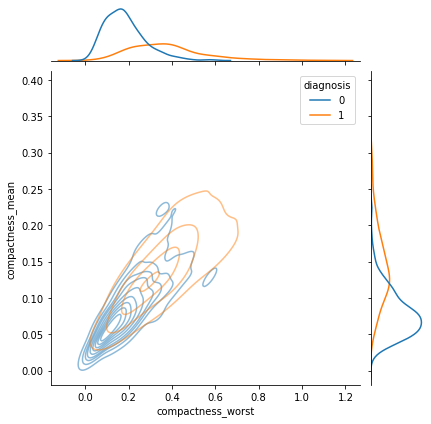

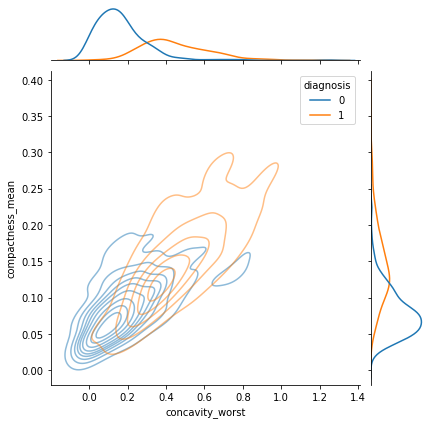

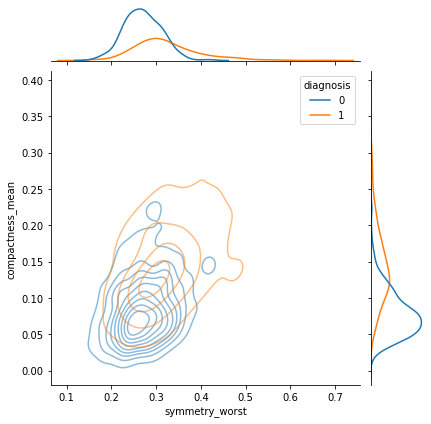

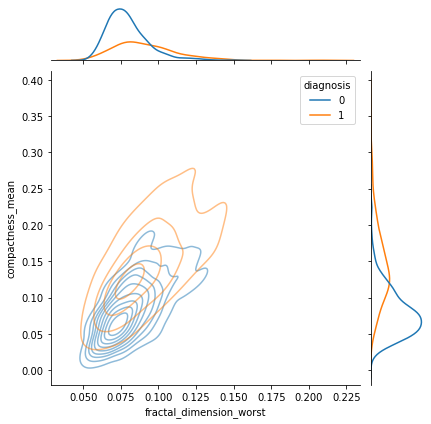

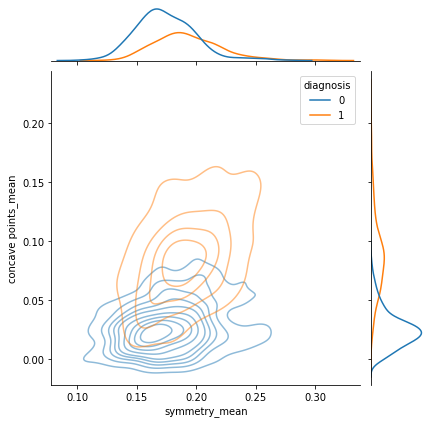

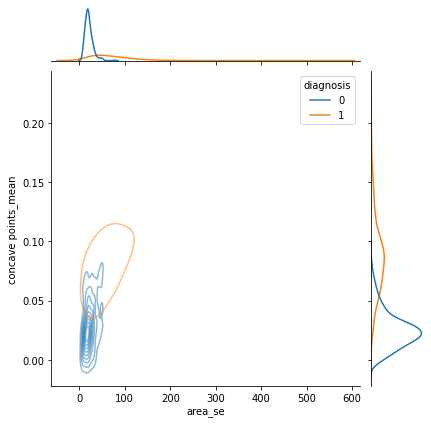

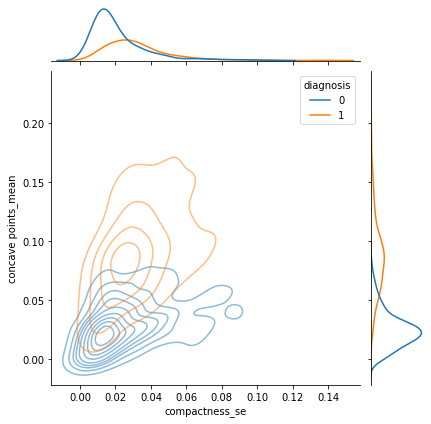

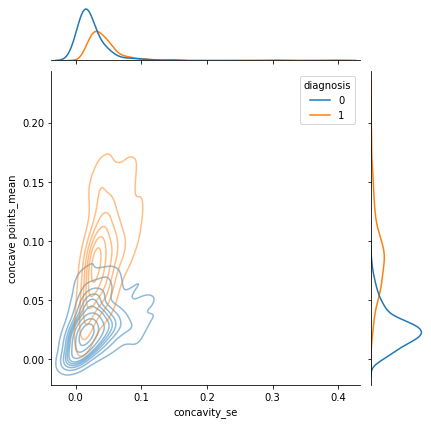

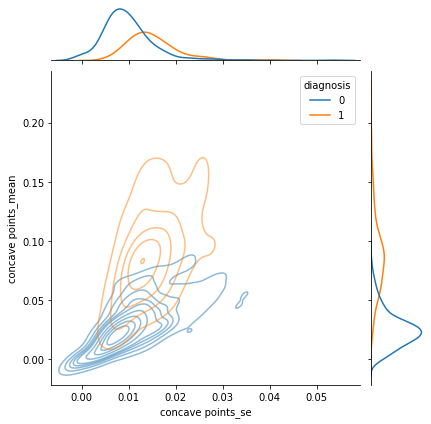

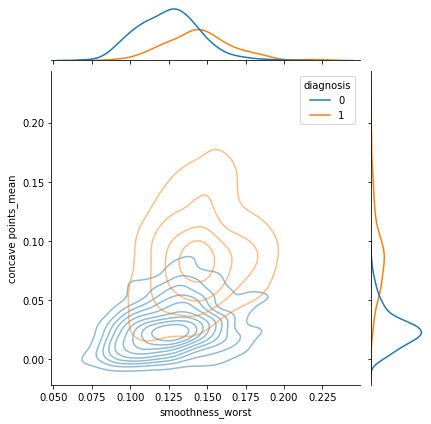

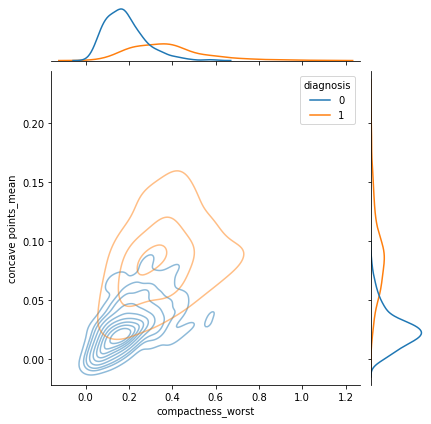

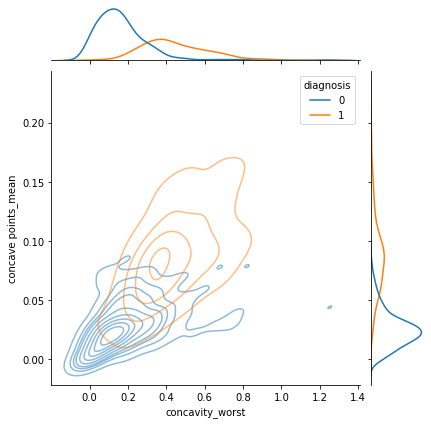

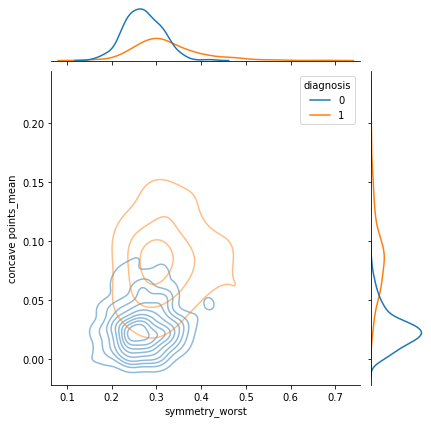

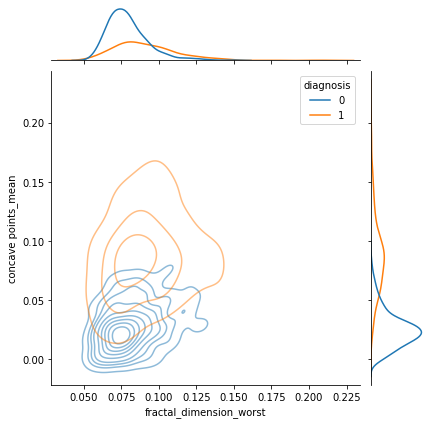

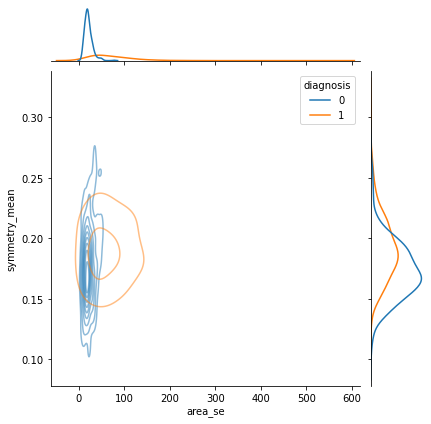

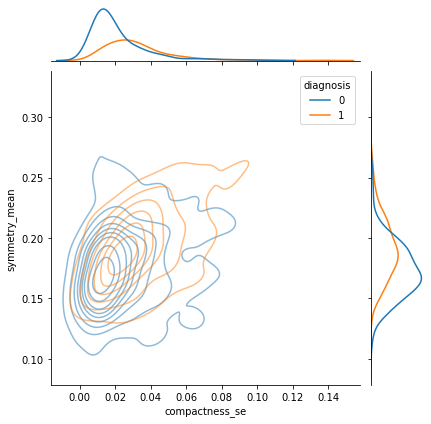

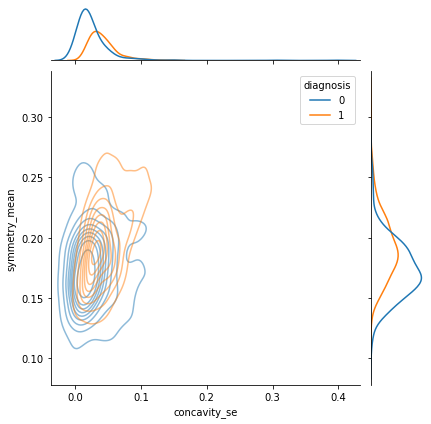

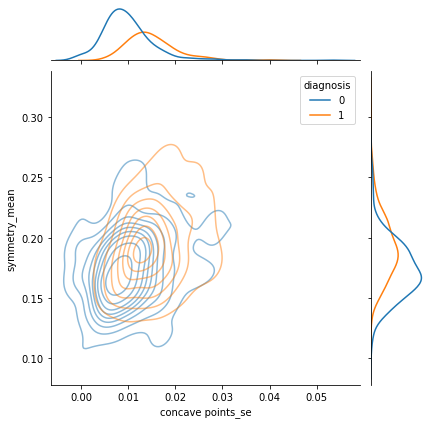

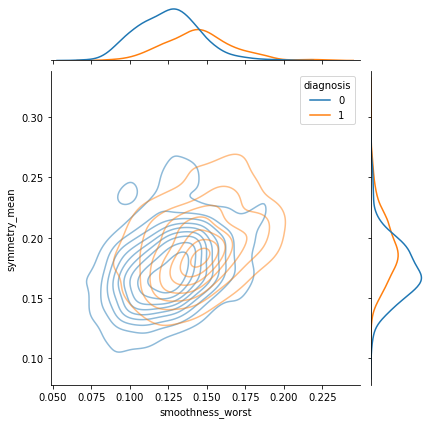

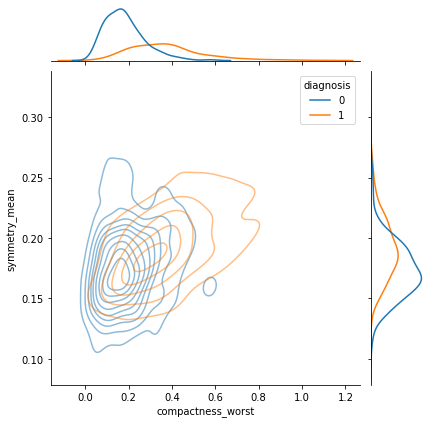

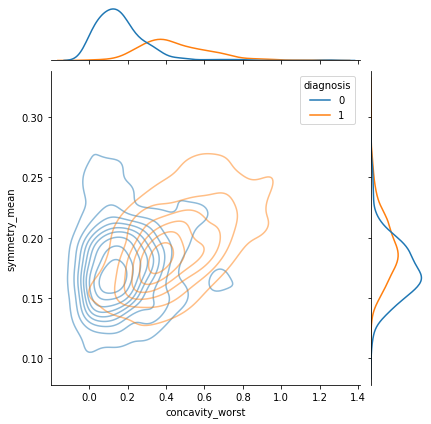

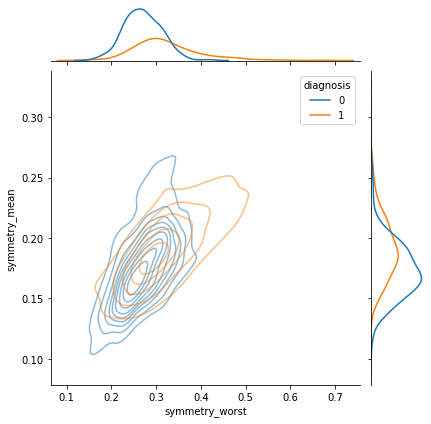

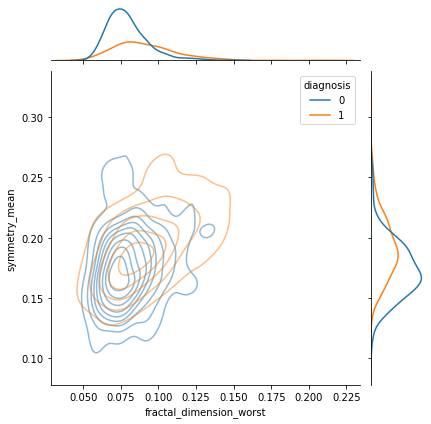

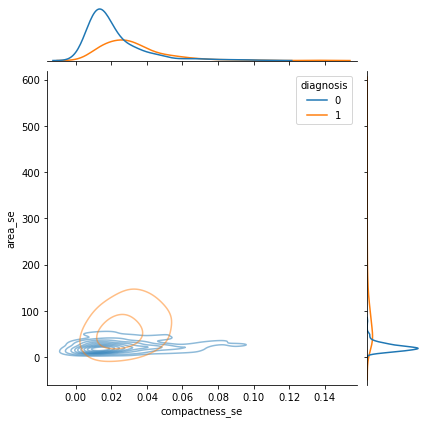

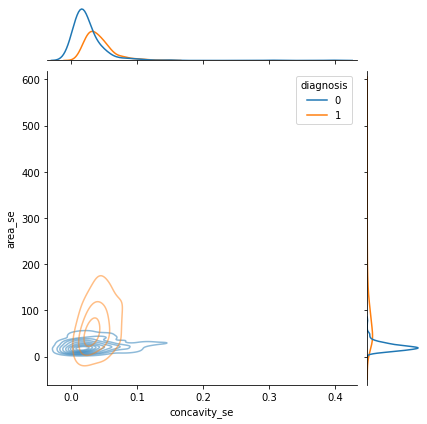

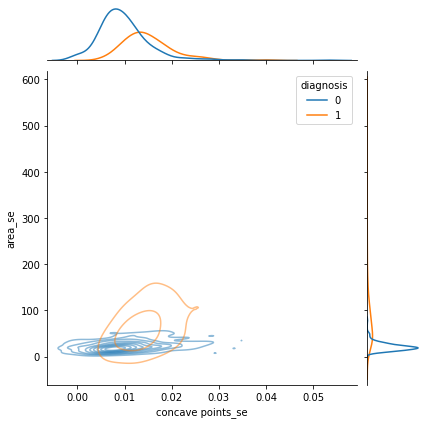

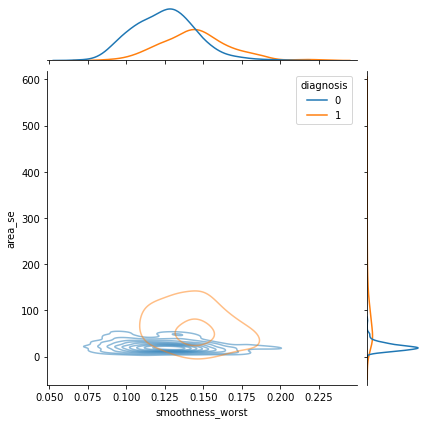

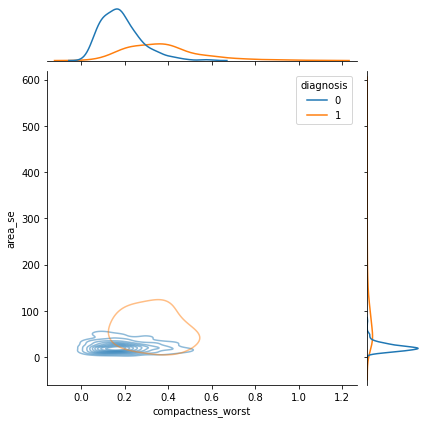

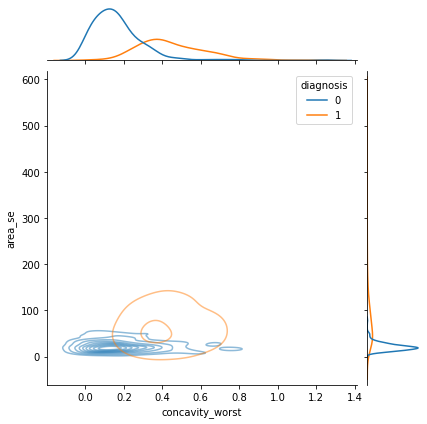

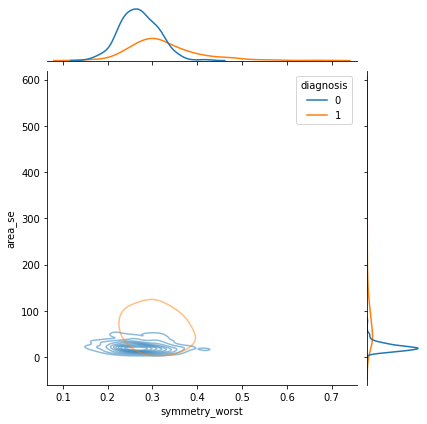

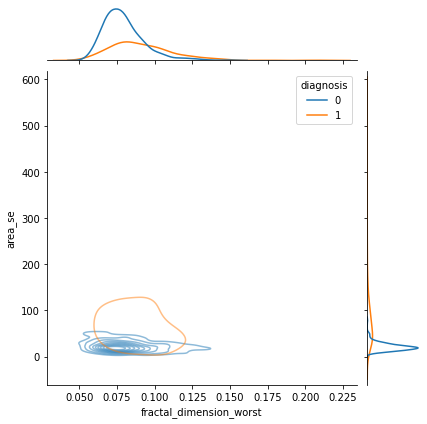

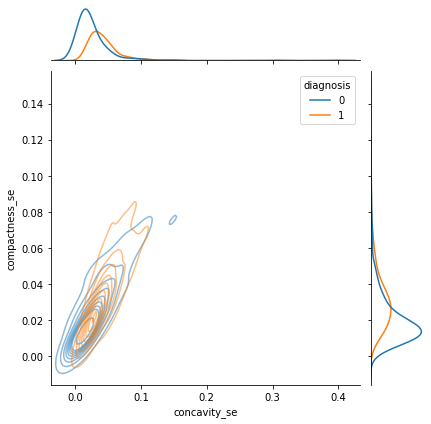

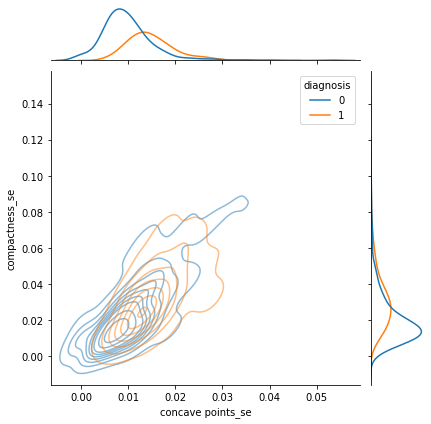

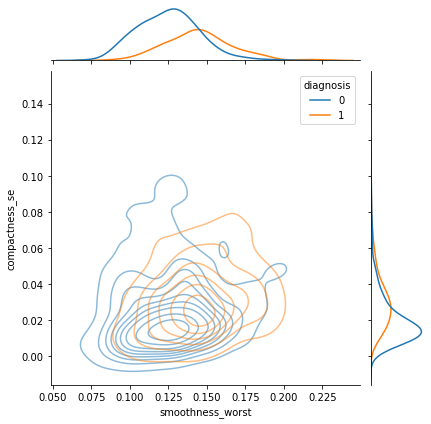

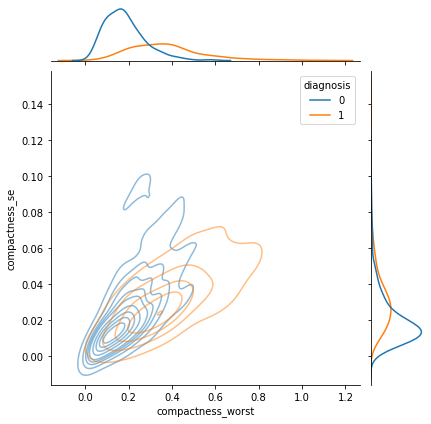

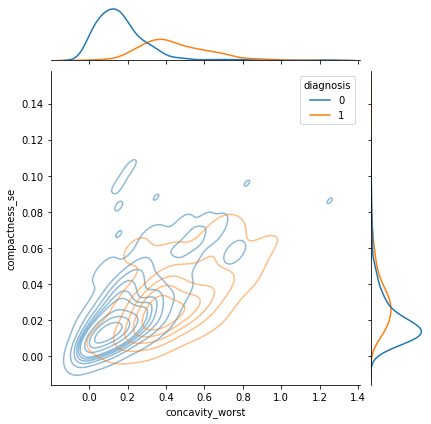

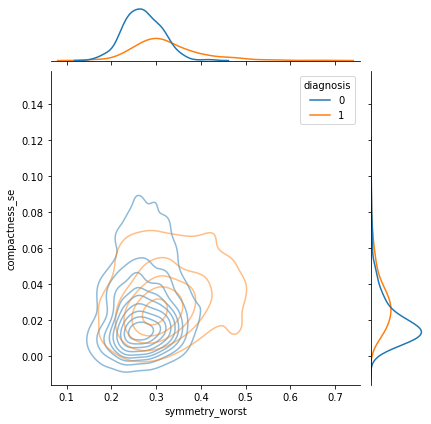

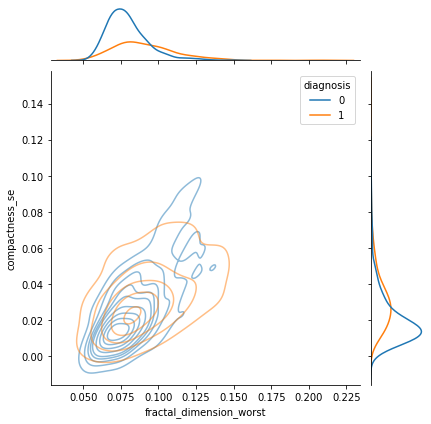

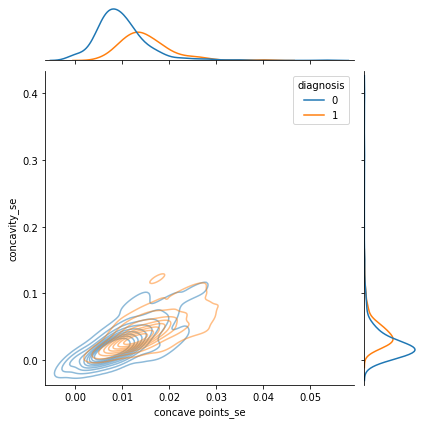

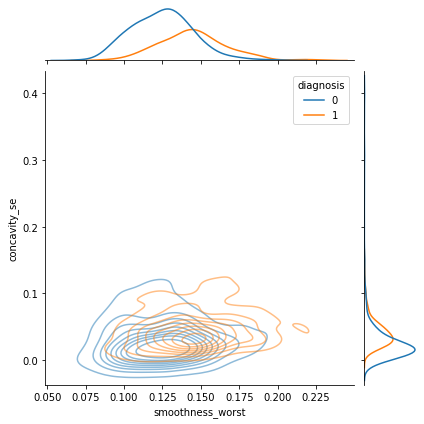

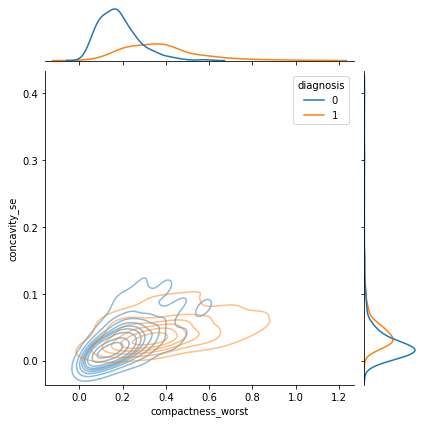

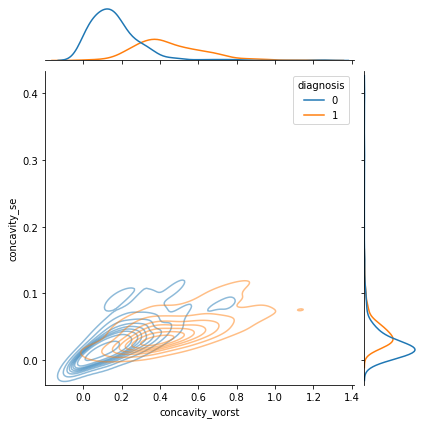

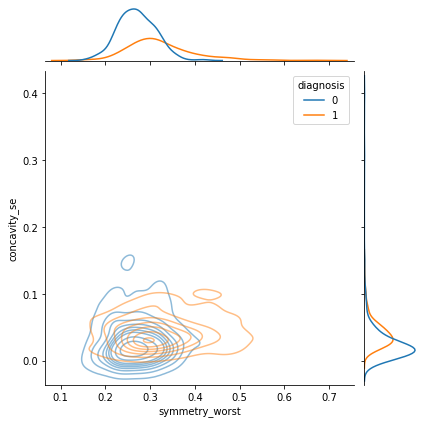

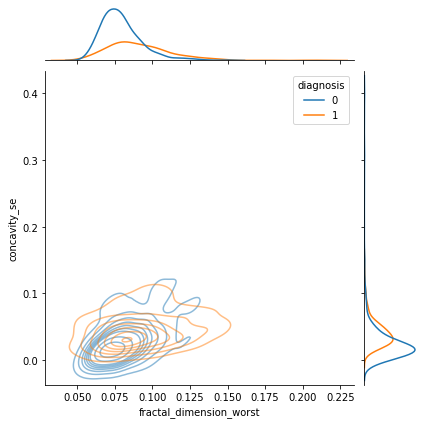

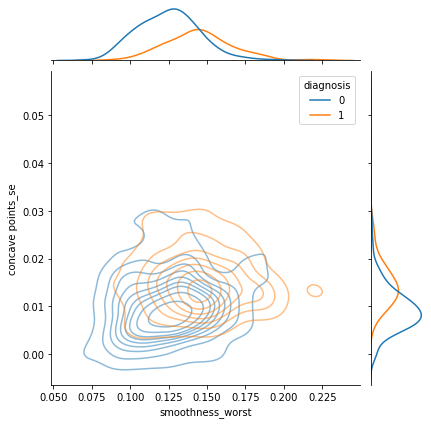

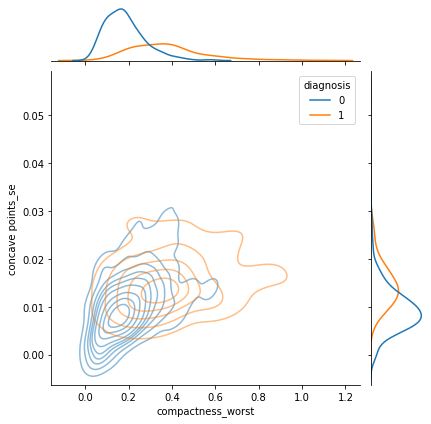

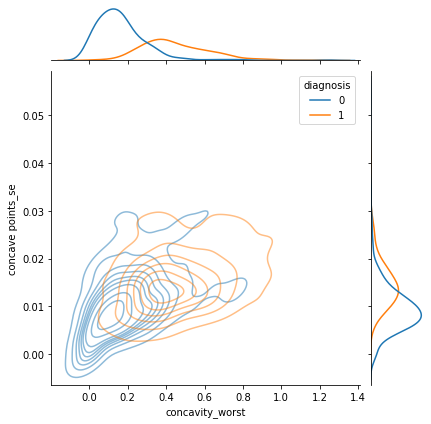

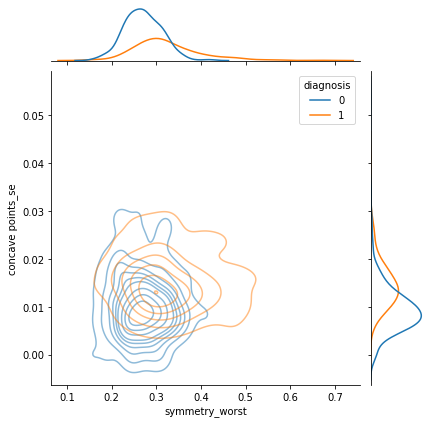

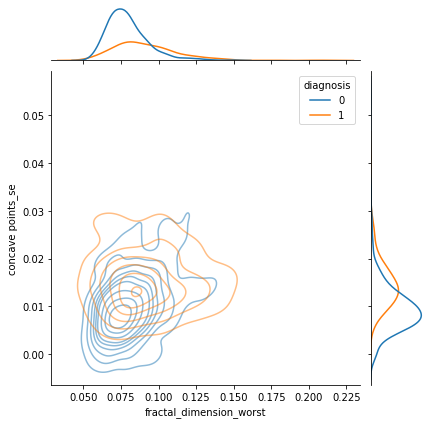

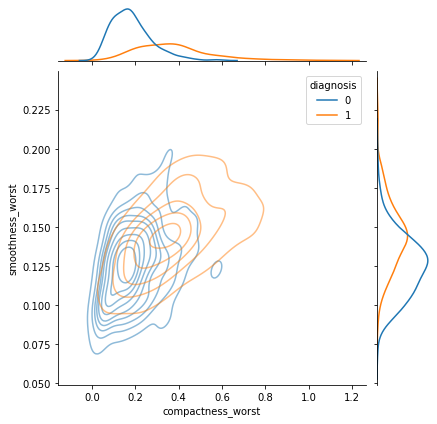

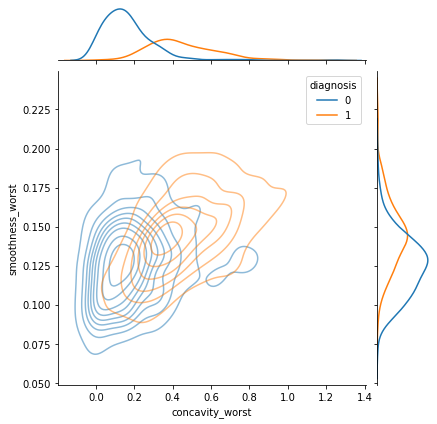

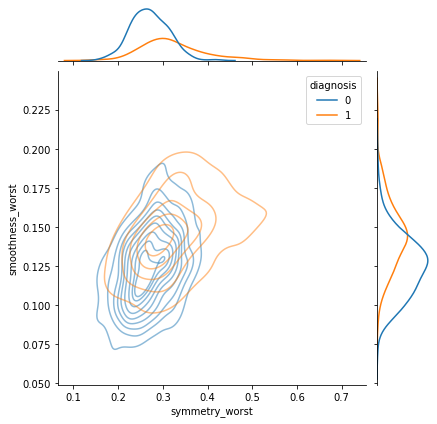

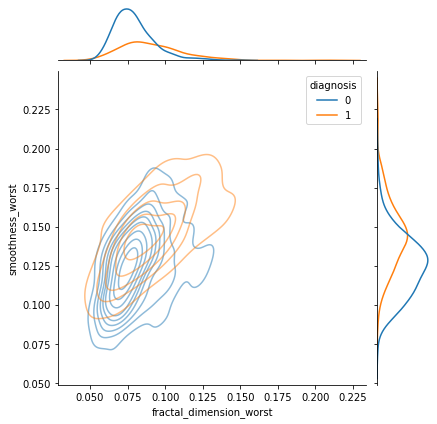

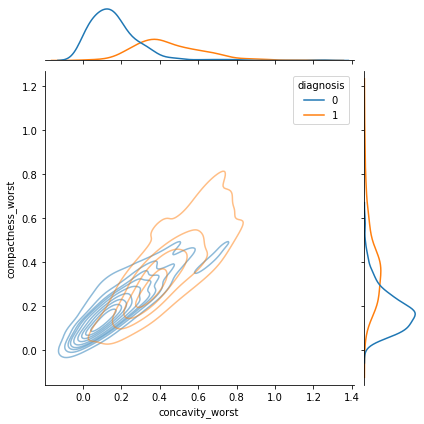

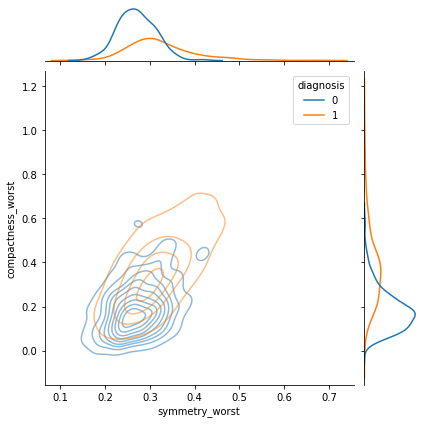

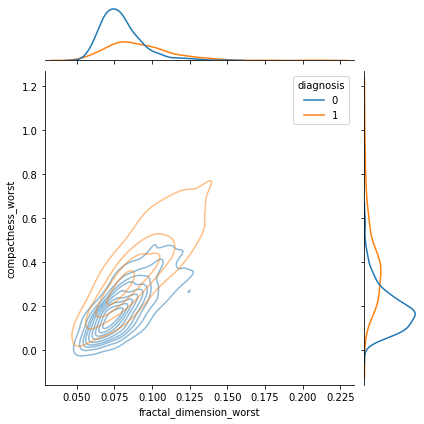

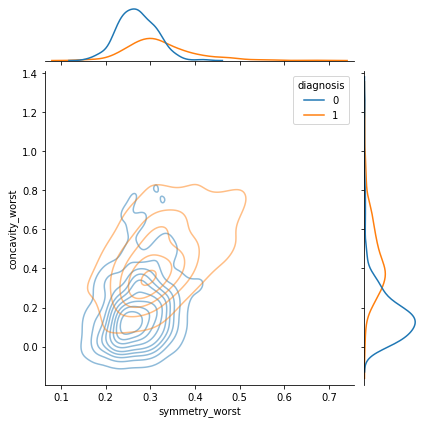

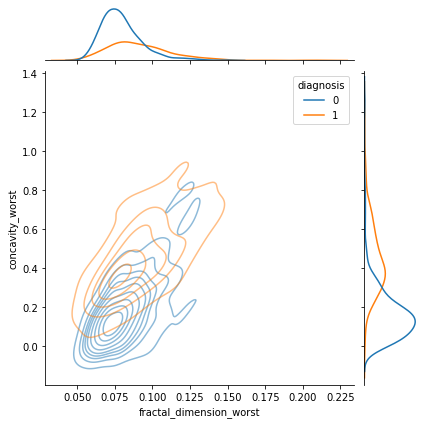

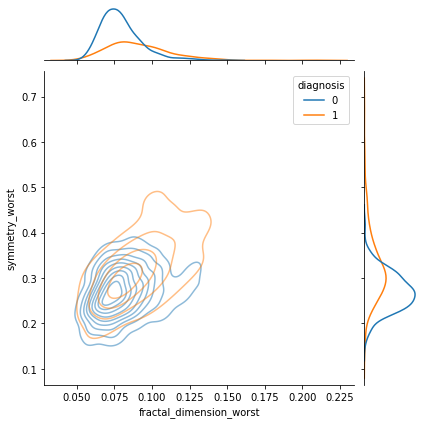

In [120]:
counter_x = 0
for i in features_to_keep_2:
  counter_y = 1 + counter_x
  for j in features_to_keep_2[counter_x:]:
    if i != j:
      sns.jointplot(data = data, y=i, x = j, hue = 'diagnosis', alpha=.5, kind='kde')
      plt.show()
      counter_y += 1
    else:
      continue
  counter_x += 1